In [96]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_text as pt
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#display all columns
pd.set_option('display.max_columns', None)

#display all row
pd.set_option('display.max_rows', None)

In [2]:
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
df_ecom = pd.read_csv(r'D:\Dataset\Final_project\dataset.csv')

In [4]:
df_ecom.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0.0,NaN,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [5]:
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  object 
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

In [6]:
df_ecom.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12835.0,2.303857,3.314427,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12313.0,80.370267,175.494016,0.0,0.000000,7.000000,92.933333,3398.750000
Informational,12946.0,0.498841,1.263276,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12946.0,34.136048,140.022848,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12946.0,31.657655,44.202635,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12307.0,1192.740077,1910.216261,0.0,182.083333,599.583333,1470.522917,63973.522230
BounceRates,12872.0,0.022309,0.048681,0.0,0.000000,0.003112,0.016933,0.200000
ExitRates,12946.0,0.043266,0.048808,0.0,0.014286,0.025329,0.050000,0.200000
PageValues,12946.0,5.875963,18.414670,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12946.0,0.061270,0.198667,0.0,0.000000,0.000000,0.000000,1.000000


#### Notes:
-  Column ProductRelated_Duration has a very high max value compared to it's 75% quartile, with the max values reaching more than 63,000 seconds or more than 17,5 hours. This could be considered an extremely unusual behavior considering the average and the 75% quartile values is in the range of 33 minutes to 40 mintues.

# Exploratory Data Analysis (EDA)

In [7]:
df_ecom2 = df_ecom.copy()

## Univariate Analysis

In [8]:
label_encoder = LabelEncoder()

df_ecom2['Month_encoded'] = label_encoder.fit_transform(df_ecom2['Month'])
df_ecom2['Visitor_encoded'] = label_encoder.fit_transform(df_ecom2['VisitorType'])

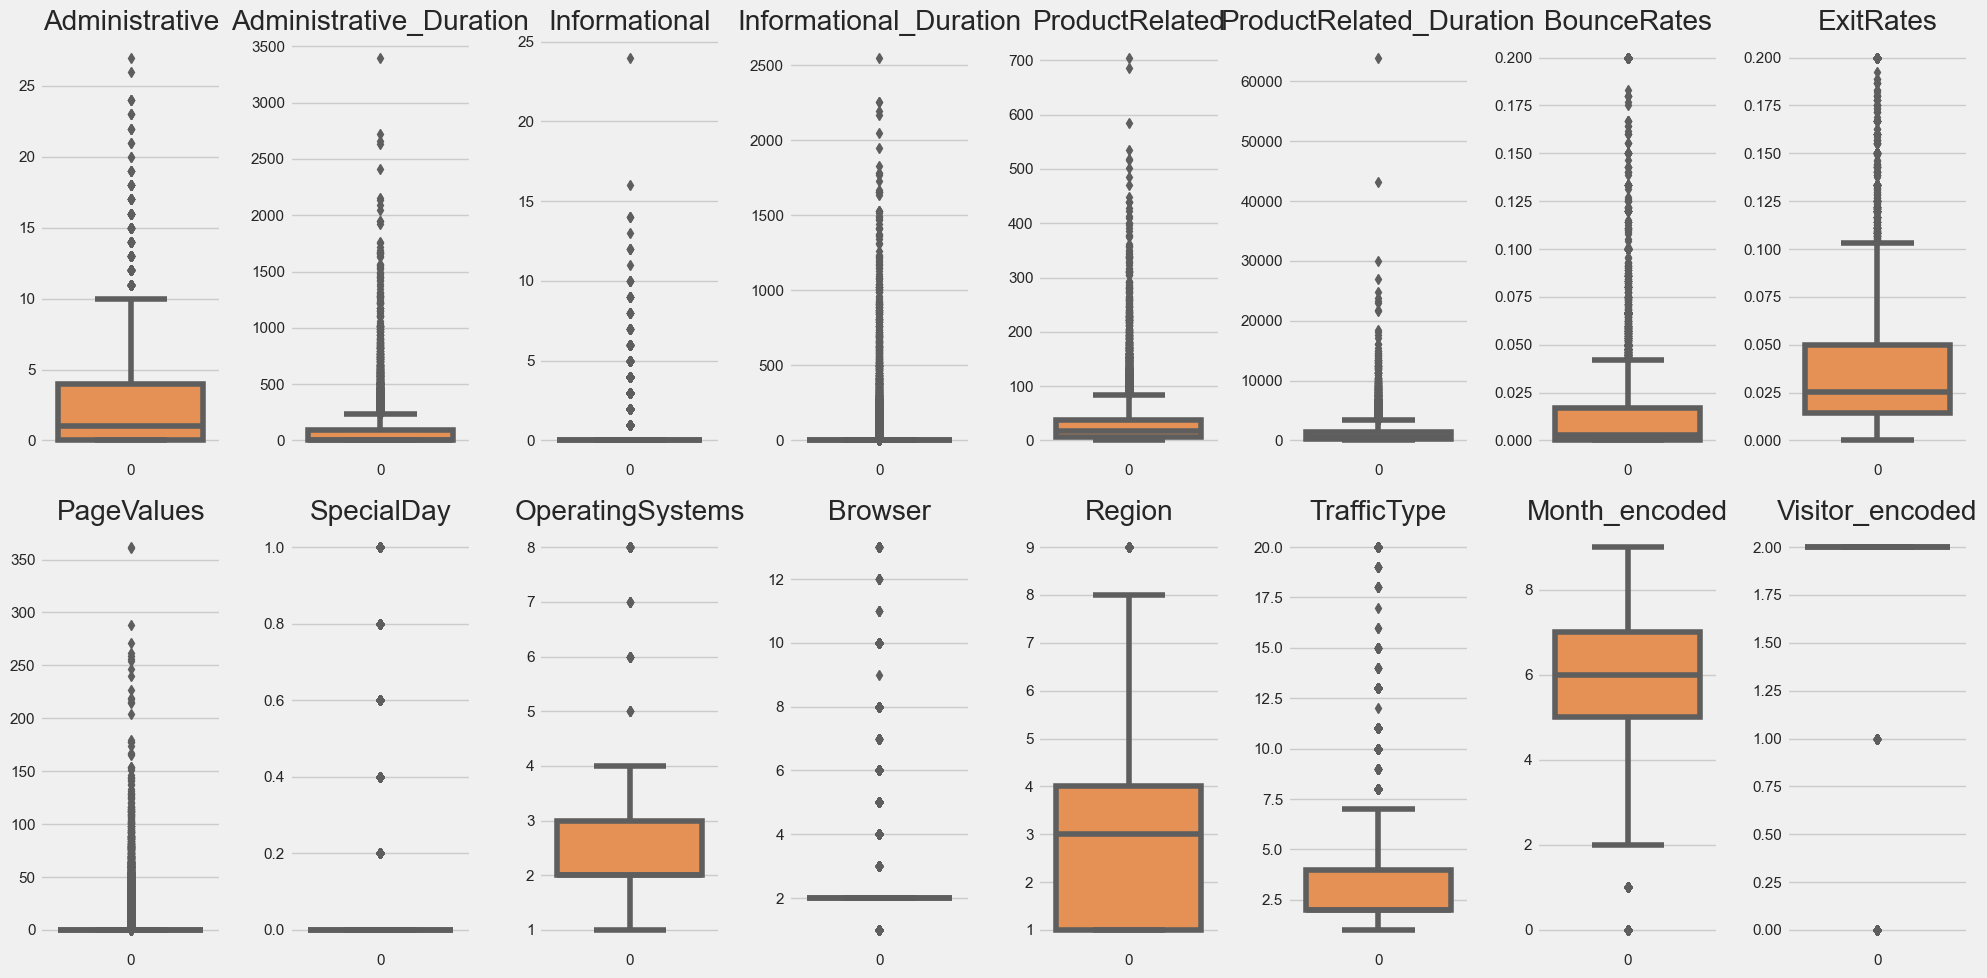

In [9]:
list_num = df_ecom2.select_dtypes(exclude=['object', 'bool'])
list_temp = list_num.columns

fig, axs = plt.subplots(2, 8, figsize=(20, 10))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Plot something in each subplot
for i in range(len(list_temp)):
    sns.boxplot(df_ecom2[list_temp[i]], palette='Oranges', orient='v', ax=axs[i])
    axs[i].set_title(f"{list_temp[i]}")

plt.tight_layout()
plt.show()

#### Notes:
1. All of the features analyzed shows the heavy presence of outliers, this would suggest the need of transformation in order to avoid bias in further analysis.
2. 4 particular features such as informational, informational_duration, pagevalues, and specialday are extremely concetrated towards one side, indicating a pronounced imbalance in the distribution of values.

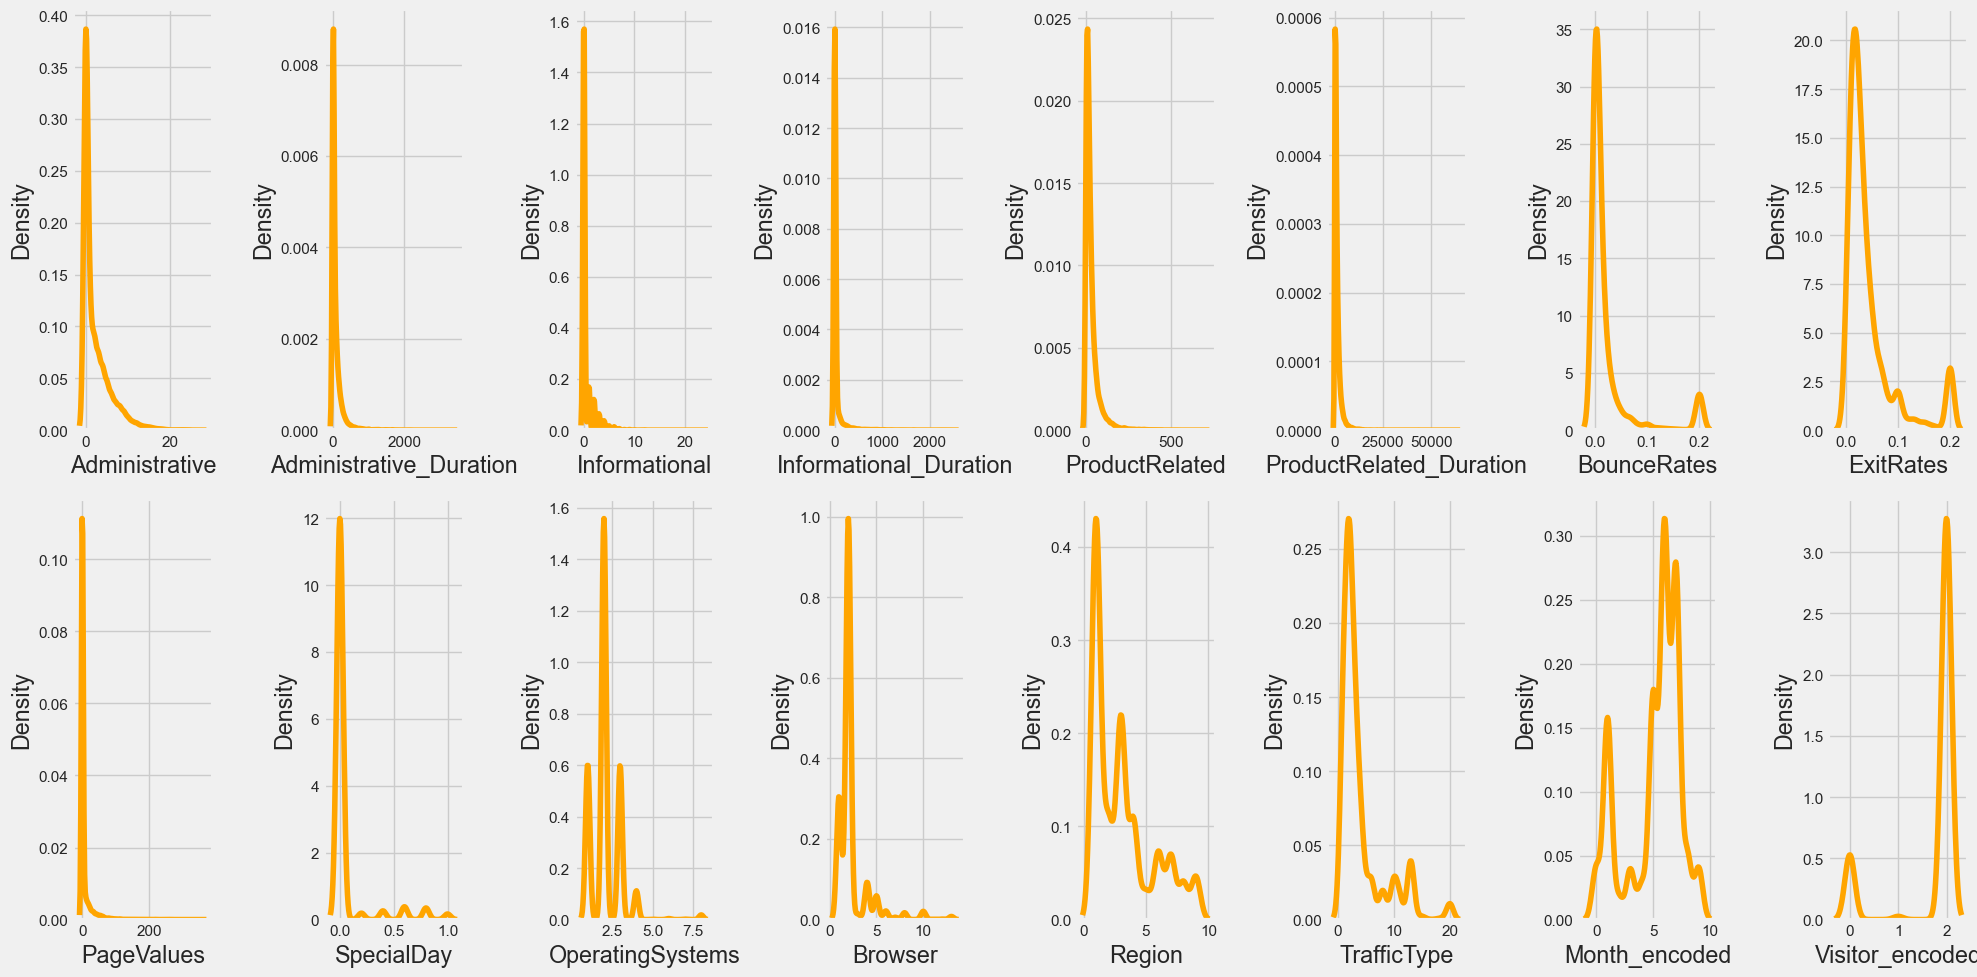

In [10]:
fig, axs = plt.subplots(2, 8, figsize=(20, 10))

axs = axs.flatten()

for i in range(len(list_temp)):
    sns.kdeplot(df_ecom2[list_temp[i]], color='orange', ax=axs[i])

plt.tight_layout()
plt.show()

### Notes:
1. Majority of the analyzed features (71%) in the dataset exhibit positive skew with presence of outliers.
2. Positively skewed distribution would suggest the need of transformation using method such as min-max or log, this is necessary considering the majority of features contain outliers that could possibly lead to bias.
3. 4 of the analyzed features could possibly have a bimodal distribution, this would indicate the presence of two distinct population with high amount of density.

In [11]:
df_ecom2['Target'] = df_ecom2['Revenue'].apply(lambda x: 'Buyer' if x == True else 'Non-Buyer')

In [12]:
df_ecom2['Target'].unique()

array(['Non-Buyer', 'Buyer'], dtype=object)

In [13]:
df_target_grp = df_ecom2.groupby(['Target']).agg(vist_cnt = ('Target', 'count')).sort_values('vist_cnt', ascending=True)
df_target_grp.reset_index(inplace=True)

df_target_grp['Percentage'] = round(df_target_grp['vist_cnt']/df_target_grp['vist_cnt'].sum()*100,2)
df_target_grp

,Target,vist_cnt,Percentage
0,Buyer,2008,15.51
1,Non-Buyer,10938,84.49


Text(0, 0.5, 'Percentage by Total Clients')

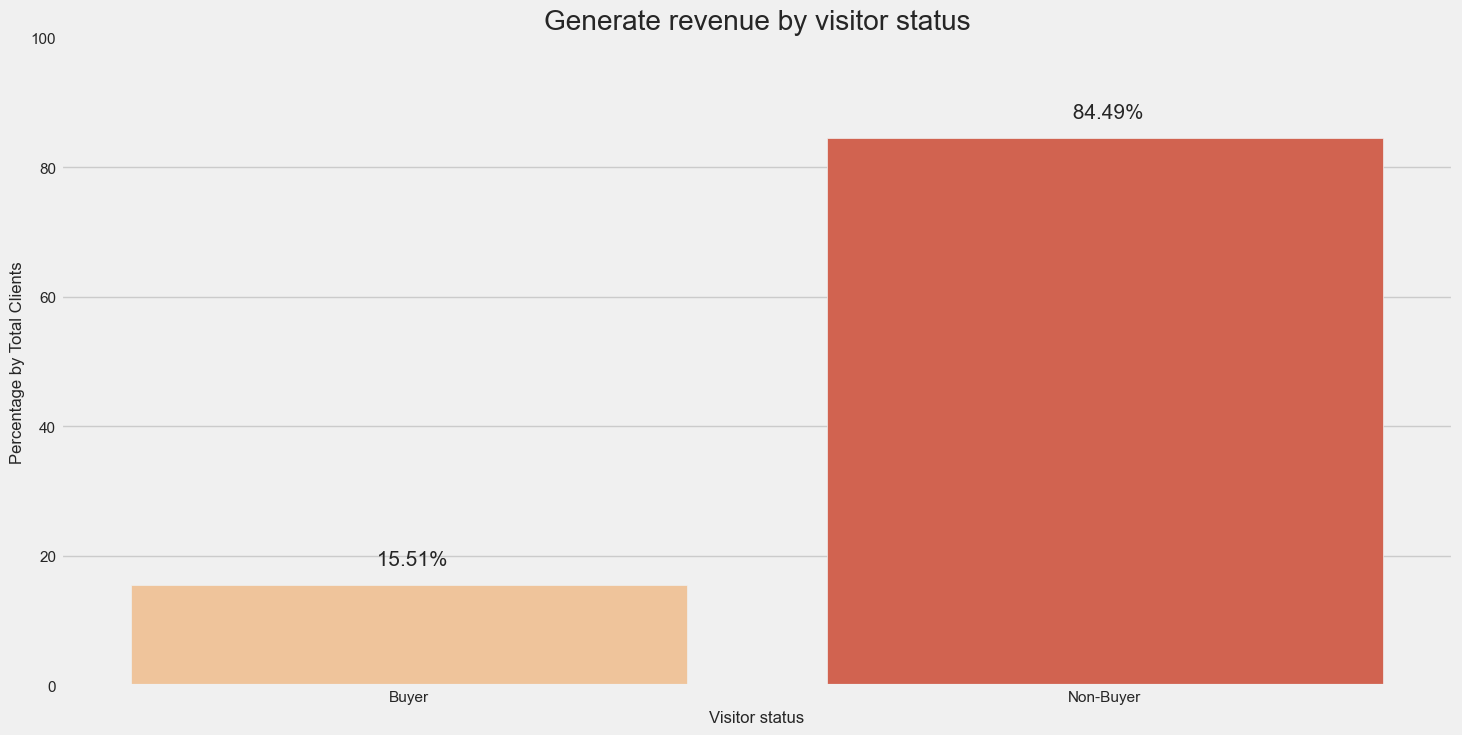

In [14]:
# Create barplot for Target
ax_diff = sns.barplot(x='Target', y='Percentage', data=df_target_grp, palette='OrRd')

pt.get_text(ax_diff,2,4, 15)

# Formatting plot
plt.ylim(0, 100)

plt.title('Generate revenue by visitor status')
plt.xlabel('Visitor status',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

### INSIGHT:
1. Visitor who are non-buyer are considerably much higher in percentages reaching 84.49% than those who are buyer. This would indicate that the company, as an ecommerce platform provider, might be lacking the means to convert visitors intention to buy a product. This could include factors such as prices, marketing, and user experience.
2. 15.51% of visitor are buyer, this indicates that the company needs to study the characteristics of the kind of visitor that visite the platform more deeply so that the company can identify which visitor are more likely to buy product and implement mitigation plan for the loss of potential buyer.

In [15]:
df_ecom2['Weekend_status'] = df_ecom2['Weekend'].apply(lambda x: 'Week-end' if x == True else 'Week-day')

In [16]:
df_ecom2['Weekend_status'].unique()

array(['Week-day', 'Week-end'], dtype=object)

In [17]:
df_weekstat_grp = df_ecom2.groupby(['Weekend_status', 'Target']).agg(vist_cnt = ('Target', 'count')).sort_values('vist_cnt', ascending=False)
df_weekstat_grp.reset_index(inplace=True)

df_weekstat_grp['Percentage'] = round(df_weekstat_grp['vist_cnt']/df_weekstat_grp['vist_cnt'].sum()*100,2)
df_weekstat_grp

,Weekend_status,Target,vist_cnt,Percentage
0,Week-day,Non-Buyer,8449,65.26
1,Week-end,Non-Buyer,2489,19.23
2,Week-day,Buyer,1480,11.43
3,Week-end,Buyer,528,4.08


Text(0, 0.5, 'Percentage by Total Clients')

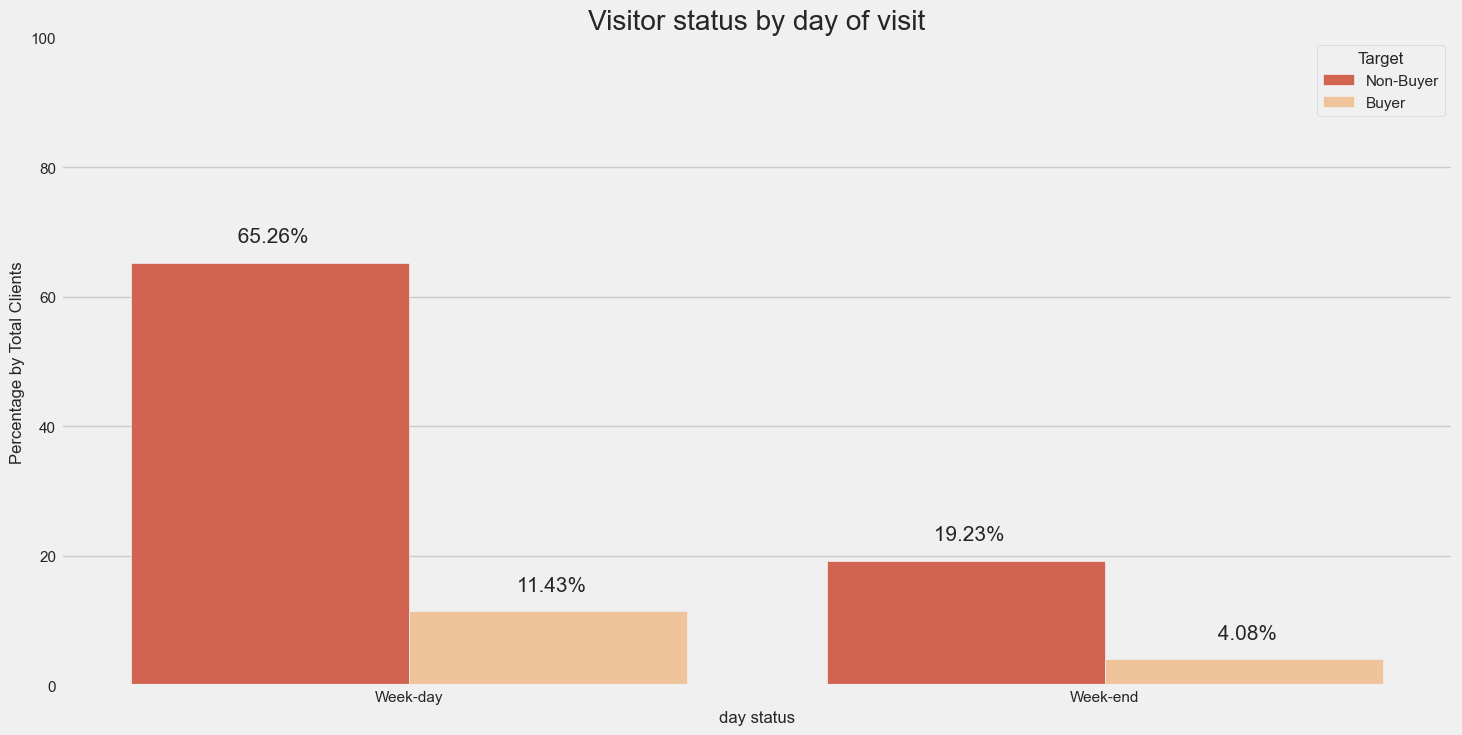

In [18]:
# Create barplot for Target
ax_weekstat = sns.barplot(x='Weekend_status', y='Percentage',hue='Target', data=df_weekstat_grp, palette='OrRd_r')

pt.get_text(ax_weekstat,2,4,15)

# Formatting plot
plt.ylim(0, 100)

plt.title('Visitor status by day of visit')
plt.xlabel('day status',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

### INSIGHT:
1. Analysis shown that visitor tend to visit on week day with 65.26% being non-buyer, while buyer only having 11.43%. This indicates the impact of visitors daily pattern would affect their overall online activity, and could suggest that the platform's customer base tend to do online shopping on business day and are less likely to do it on week-end which are considered to be leisure days.
2. This finding are inline with research done by SaleCycle.com which stated that week day are the busiest retail day for online sales, while week-end particularly saturday being the worst day of the week for online sales.

In [19]:
for index, row in df_ecom2.iterrows():
    if row['SpecialDay'] <=0.2:
        df_ecom2.at[index, 'SpecialD_Category'] = 'Close'
    elif row['SpecialDay'] <=0.4:
        df_ecom2.at[index, 'SpecialD_Category'] = 'Moderate'
    elif row['SpecialDay'] <=1:
        df_ecom2.at[index, 'SpecialD_Category'] = 'Far'

In [20]:
df_speciald_grp = df_ecom2.groupby(['Target', 'SpecialD_Category']).agg(vist_cnt = ('Target', 'count')).sort_values('vist_cnt', ascending=False)
df_speciald_grp.reset_index(inplace=True)

df_speciald_grp['Percentage'] = round(df_speciald_grp['vist_cnt']/df_speciald_grp['vist_cnt'].sum()*100,2)
df_speciald_grp

,Target,SpecialD_Category,vist_cnt,Percentage
0,Non-Buyer,Close,9883,76.34
1,Buyer,Close,1939,14.98
2,Non-Buyer,Far,816,6.30
3,Non-Buyer,Moderate,239,1.85
4,Buyer,Far,55,0.42
5,Buyer,Moderate,14,0.11


Text(0, 0.5, 'Percentage of visitors')

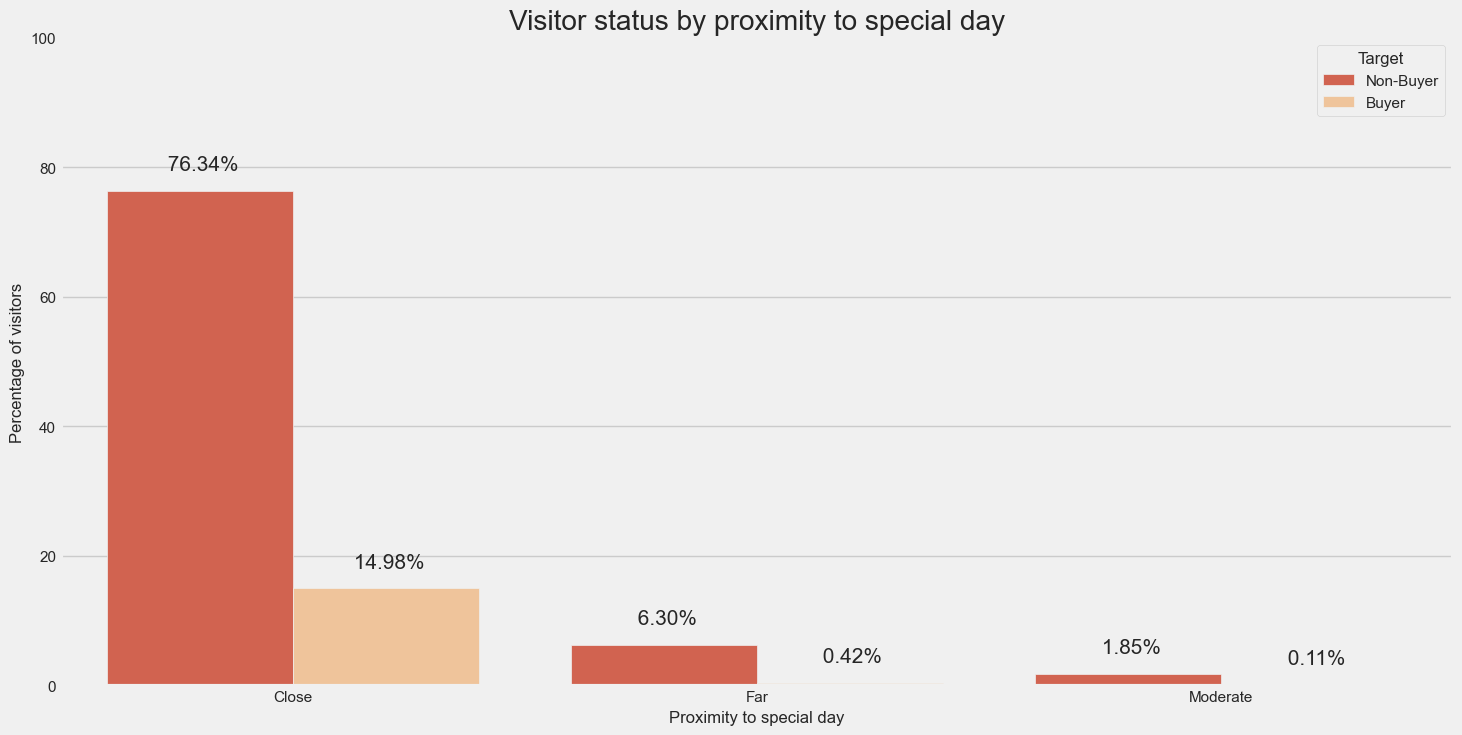

In [21]:
# Create barplot for Target
ax_spec_diff = sns.barplot(x='SpecialD_Category', y='Percentage',hue='Target', data=df_speciald_grp, palette='OrRd_r')

pt.get_text(ax_spec_diff,2,4,15)

# Formatting plot
plt.ylim(0, 100)

plt.title('Visitor status by proximity to special day')
plt.xlabel('Proximity to special day',fontsize=12)
plt.ylabel('Percentage of visitors',fontsize=12)

### INSIGHT:
1. Majority of visitors visit the ecommerce platform when it's close to a special day, with visitor that are non-buyer reaching 76.34% of total visitor, while visitor who are buyer only having 14.98%. This could indicate that while visitors are attracted to possible upcoming events, those who are making purchases are more likely to be those who are familiar with the platform and thus more inclined to return for purchases if a similar event recurs.
2. There is a difference of more than 14% in the percentages of buyers when the special day is close compared to when it's far or moderate. This suggests that visitors are aware and expected some sort of special offer that are asociated with specific special day.

In [22]:
df_vistype_grp = df_ecom2.groupby(['Target', 'VisitorType']).agg(vist_cnt = ('Target', 'count')).sort_values('vist_cnt', ascending=False)
df_vistype_grp.reset_index(inplace=True)

df_vistype_grp['Percentage'] = round(df_vistype_grp['vist_cnt']/df_vistype_grp['vist_cnt'].sum()*100,2)
df_vistype_grp

,Target,VisitorType,vist_cnt,Percentage
0,Non-Buyer,Returning_Visitor,9520,73.54
1,Buyer,Returning_Visitor,1552,11.99
2,Non-Buyer,New_Visitor,1345,10.39
3,Buyer,New_Visitor,440,3.40
4,Non-Buyer,Other,73,0.56
5,Buyer,Other,16,0.12


Text(0, 0.5, 'Percentage by Total Clients')

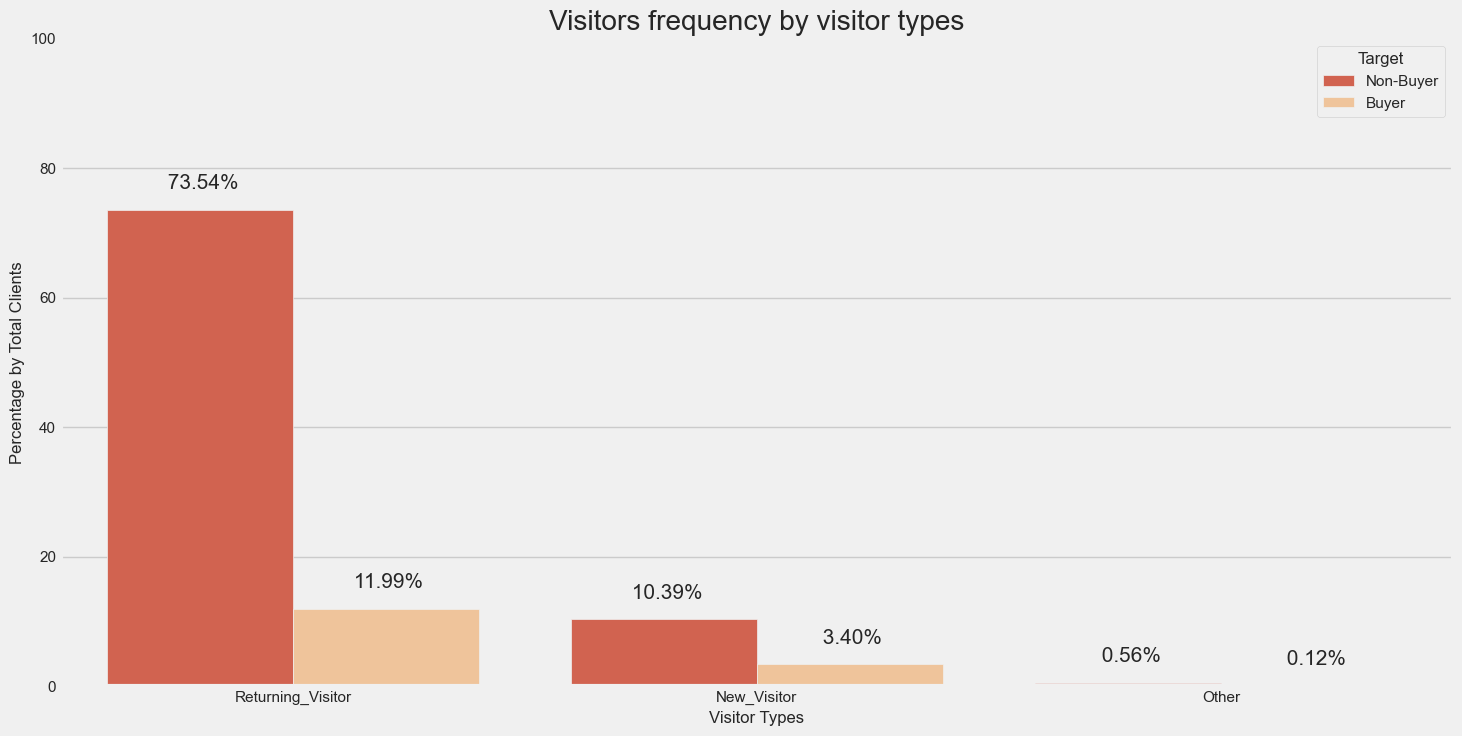

In [23]:
# Create barplot for Target
ax_vistype_diff = sns.barplot(x='VisitorType', y='Percentage',hue='Target', data=df_vistype_grp, palette='OrRd_r', )

pt.get_text(ax_vistype_diff,2,4,15)

# Formatting plot
plt.ylim(0, 100)
plt.title('Visitors frequency by visitor types')
plt.xlabel('Visitor Types',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

### INSIGHT:
1. Returning visitor make up the majority of visitor of the platform, with 73.54% of them as non-buyer and 11.99% as buyer. This indicate that returning visitor are more likely to make repeated purchase, this also suggest that the visitor purchasing ability are affected by the percieved benefit of ongoing or upcoming promotional program of the platform.
2. The second-highest percentage of visitors consists of those who are accessing the platform for the first time, with 10.39% being non-buyers and 3.40% being buyers. This would indicate that the ongoing marketing campaign by the platform is attracting new visitors and potential buyers, ensuring an influx of new visitors.
3. Visitors classified as 'Others,' regardless of buyer status, account for a very small portion with the highest only reaching 0.56% of total visitors (non-buyer) compared to the other two categories. This suggests that visitors of the 'Others' type likely contribute minimally to the website's revenue generation. They might be visitors that the website's failed to identify as either returning or new visitors.
4. The reason the majority of the platform's visitors are returning visitors is that those who are already familiar with the platform and are satisfied with the provided benefits of using it compared to competitors, according to (Susanto, 2013) factor such as promotions that could benefit the customer can strongly determines the customer loyalty and intention. This indicates that the platform has succeeded in creating brand loyalty among its customers.

In [24]:
df_ecom2['ProductRelated'].describe()

count    12946.000000
mean        31.657655
std         44.202635
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

In [25]:
# to be analyze
df_ecom2['ProductRelated'].max()

705

In [26]:
# to be analyze - continued
df_ecom2['ProductRelated_Duration_minutes'] = df_ecom2['ProductRelated_Duration']/60

In [27]:
Q1 = df_ecom2['ProductRelated_Duration_minutes'].quantile(0.25)
Q3 = df_ecom2['ProductRelated_Duration_minutes'].quantile(0.75)
IQR = Q3 - Q1
outlier = (Q3 + 1.5 * IQR)
print(f'Values are considered outlier if more than: {outlier:.2f}')

Values are considered outlier if more than: 56.72


In [28]:
for index, row in df_ecom2.iterrows():
    if row['ProductRelated_Duration_minutes'] <=5:
        df_ecom2.at[index, 'ProductD_category'] = 'Short'
    elif row['ProductRelated_Duration_minutes'] <=15:
        df_ecom2.at[index, 'ProductD_category'] = 'Medium'
    elif row['ProductRelated_Duration_minutes'] <=outlier:
        df_ecom2.at[index, 'ProductD_category'] = 'Long'
    else:
        df_ecom2.at[index, 'ProductD_category'] = 'Other'

In [29]:
df_productD_grp = df_ecom2.groupby(['Target', 'ProductD_category']).agg(vist_cnt = ('Target', 'count')).sort_values('vist_cnt', ascending=False)
df_productD_grp.reset_index(inplace=True)

df_productD_grp['Percentage'] = round(df_productD_grp['vist_cnt']/df_productD_grp['vist_cnt'].sum()*100,2)
df_productD_grp

,Target,ProductD_category,vist_cnt,Percentage
0,Non-Buyer,Short,3951,30.52
1,Non-Buyer,Long,2980,23.02
2,Non-Buyer,Medium,2809,21.70
3,Non-Buyer,Other,1198,9.25
4,Buyer,Long,805,6.22
5,Buyer,Medium,603,4.66
6,Buyer,Other,378,2.92
7,Buyer,Short,222,1.71


Text(0, 0.5, 'Percentage by Total Clients')

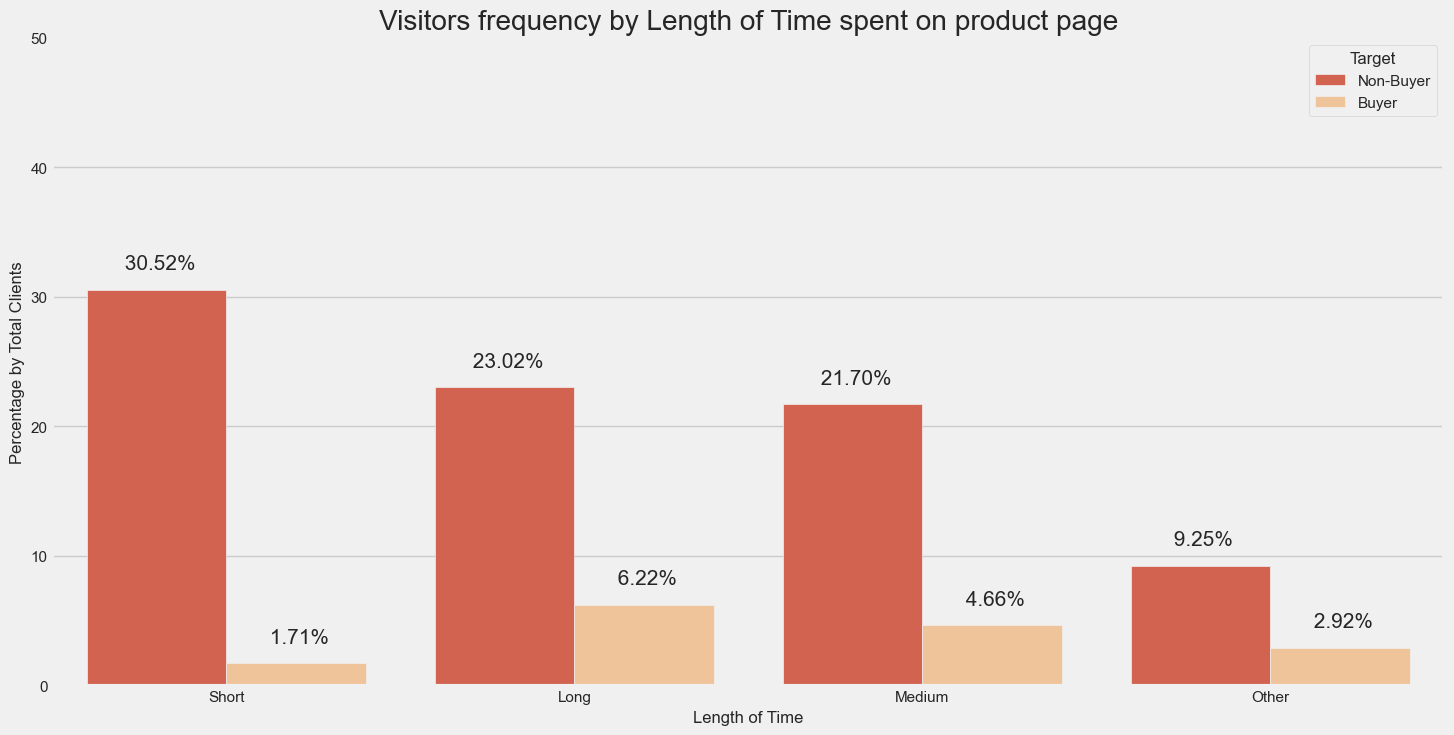

In [30]:
# Create barplot for Target
ax_productD_diff = sns.barplot(x='ProductD_category', y='Percentage',hue='Target', data=df_productD_grp, palette='OrRd_r', )

pt.get_text(ax_productD_diff,2,2,15)

# Formatting plot
plt.ylim(0, 50)
plt.title('Visitors frequency by Length of Time spent on product page')
plt.xlabel('Length of Time',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

### INSIGHT:
1. Visitor who spent a short amount of time (up to 5 minutes) to browse has the highest percentages of non-buyer traffic reaching 34.07% of visitor, but has the second lowest percentages of buyer with only 1.71% of visitor.
2. 23.02% of visitor spent a long amount of time (>15 minutes) to browse and are the second highest traffic, with 6.2% of the visitor are buyer. Being the second highest traffic with the highest percentages of buyer would mean that visitors who spend a longer time browsing products are more likely to make a purchase compared to those who spend a shorter time. This indicates that the level of engagement and interest in the products plays a significant role in the decision to purchase.
3. 21.70% of visitors spent a medium amount of time (5-15 minutes) browsing product pages and are in third place in terms of traffic, with only a 0.89% margin of non-buyers compared to the second place, where 4.66% of visitors are buyers. This indicates that there is little difference in visitor purchasing behavior, and it is likely affected by the visitors' initial intentions, such as exploring and comparing products.
4. Visitors who spent an unusual amount of time (>55 minutes) browsing product pages have the lowest amount of traffic and are uncommon compared to other time lengths, with only 9.25% being non-buyers and 2.92% being buyers. This unusually long browsing time could be due to a genuine interest in particular products and the visitor behavior in comparing them with other products.
5. Visitors who spent a long or medium amount of time browsing product pages showed similar percentages for both non-buyers and buyers. This suggests that conversions are more likely among visitors who spent 5-15 minutes or more than 15 minutes browsing. Conversely, conversions are less likely among visitors who browse for a short amount of time or an unusually long amount of time.

In [31]:
df_ecom2['Bounces_to_exit_ratio'] = df_ecom2['BounceRates']/df_ecom2['ExitRates']

In [32]:
for index, row in df_ecom2.iterrows():
    if row['Bounces_to_exit_ratio'] <1:
        df_ecom2.at[index, 'Bouncestoexit_category'] = 'Likely to Exit'
    elif row['Bounces_to_exit_ratio'] == 1:
        df_ecom2.at[index, 'Bouncestoexit_category'] = 'Neutral'
    elif row['Bounces_to_exit_ratio'] >1:
        df_ecom2.at[index, 'Bouncestoexit_category'] = 'Likely to Bounces'
    else:
        df_ecom2.at[index, 'Bouncestoexit_category'] = 'Neutral'

In [33]:
df_ecom2['Bouncestoexit_category'].value_counts()

Bouncestoexit_category
Likely to Exit       11767
Neutral                999
Likely to Bounces      180
Name: count, dtype: int64

In [34]:
df_vistbounces_grp = df_ecom2.groupby(['VisitorType','Bouncestoexit_category']).agg(vist_cnt=('VisitorType','count')).sort_values('vist_cnt', ascending=False)
df_vistbounces_grp.reset_index(inplace=True)

df_vistbounces_grp['Percentage'] = round(df_vistbounces_grp['vist_cnt']/df_vistbounces_grp['vist_cnt'].sum()*100,2)
df_vistbounces_grp

,VisitorType,Bouncestoexit_category,vist_cnt,Percentage
0,Returning_Visitor,Likely to Exit,10031,77.48
1,New_Visitor,Likely to Exit,1665,12.86
2,Returning_Visitor,Neutral,883,6.82
3,Returning_Visitor,Likely to Bounces,158,1.22
4,New_Visitor,Neutral,99,0.76
5,Other,Likely to Exit,71,0.55
6,New_Visitor,Likely to Bounces,21,0.16
7,Other,Neutral,17,0.13
8,Other,Likely to Bounces,1,0.01


Text(0, 0.5, 'Percentage by Total Clients')

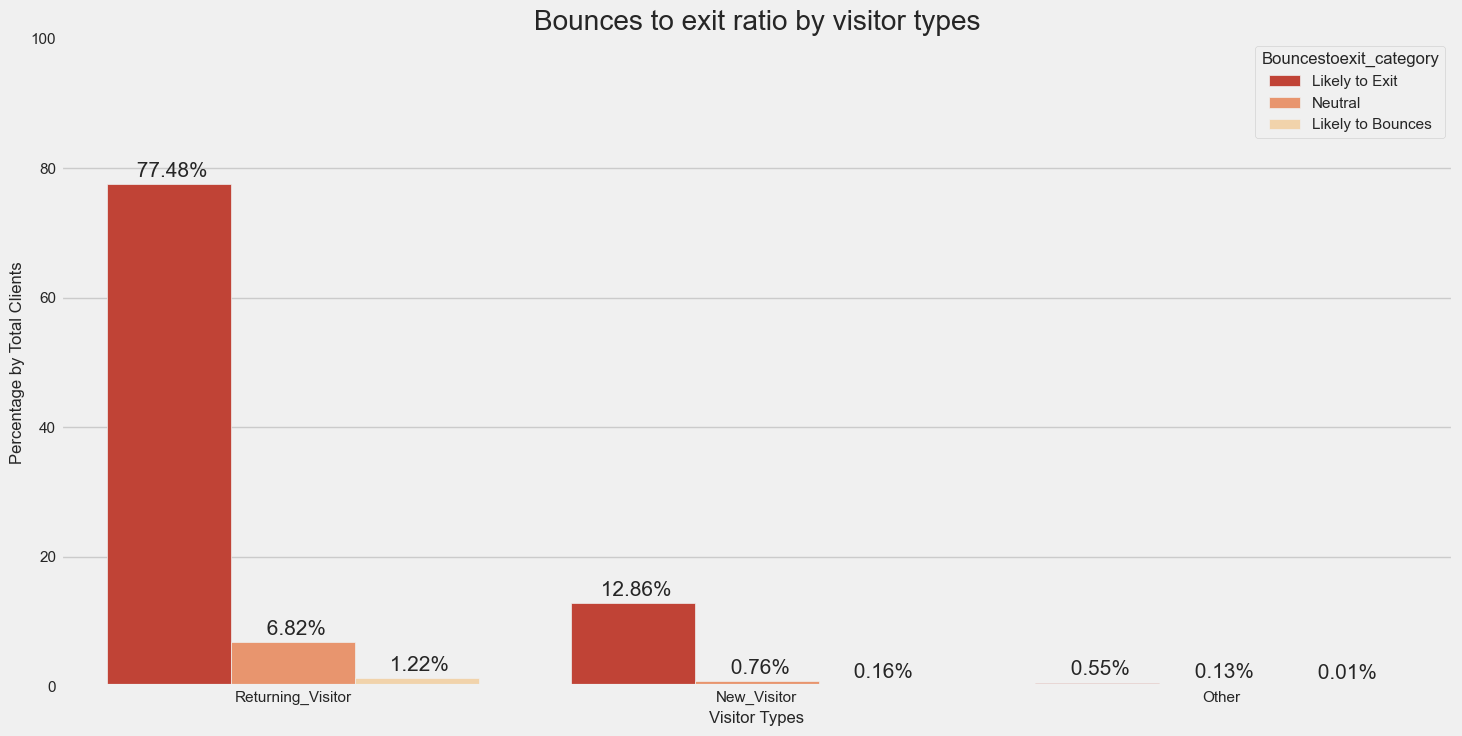

In [35]:
## Create barplot for Target
ax_vistbounces_ratio = sns.barplot(x='VisitorType', y='Percentage',hue='Bouncestoexit_category', data=df_vistbounces_grp, palette='OrRd_r')

pt.get_text(ax_vistbounces_ratio,2,2,15)

# Formatting plot
plt.ylim(0, 100)
plt.title('Bounces to exit ratio by visitor types')
plt.xlabel('Visitor Types',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

### INSIGHT:

- The majority of visitors who are more likely to exit are returning visitors, reaching 77.48% of total visitors. Only 1.22% are likely to bounce, and 6.82% are neutral. This is an expected result because returning visitors are likely already familiar with the site layout and have a specific goal in mind, such as checking order status and current event. This also suggests that the site is able to facilitate quick responses so that visitors can find the information they need efficiently.
- 12.86% of visitors who are more likely to exit are new visitors, and among new visitors, those who are likely to bounce are much fewer in comparison, with only 0.16% of total visitors. This finding raises a concern about the possible lack of engagement and perceived interest that would keep new visitors exploring for an extended period of time. This suggests that the page that the new visitor initially landed on could be lacking in information or functionality that the new visitors are looking for."

## Multivariate Analysis

In [36]:
df_ecom2['Weekend_encoded'] = label_encoder.fit_transform(df_ecom2['Weekend'])
df_ecom2['Revenue_encoded'] = label_encoder.fit_transform(df_ecom2['Revenue'])

col_num = df_ecom2.select_dtypes(exclude=['object', 'bool'])
list_col_num = col_num.columns

<Axes: >

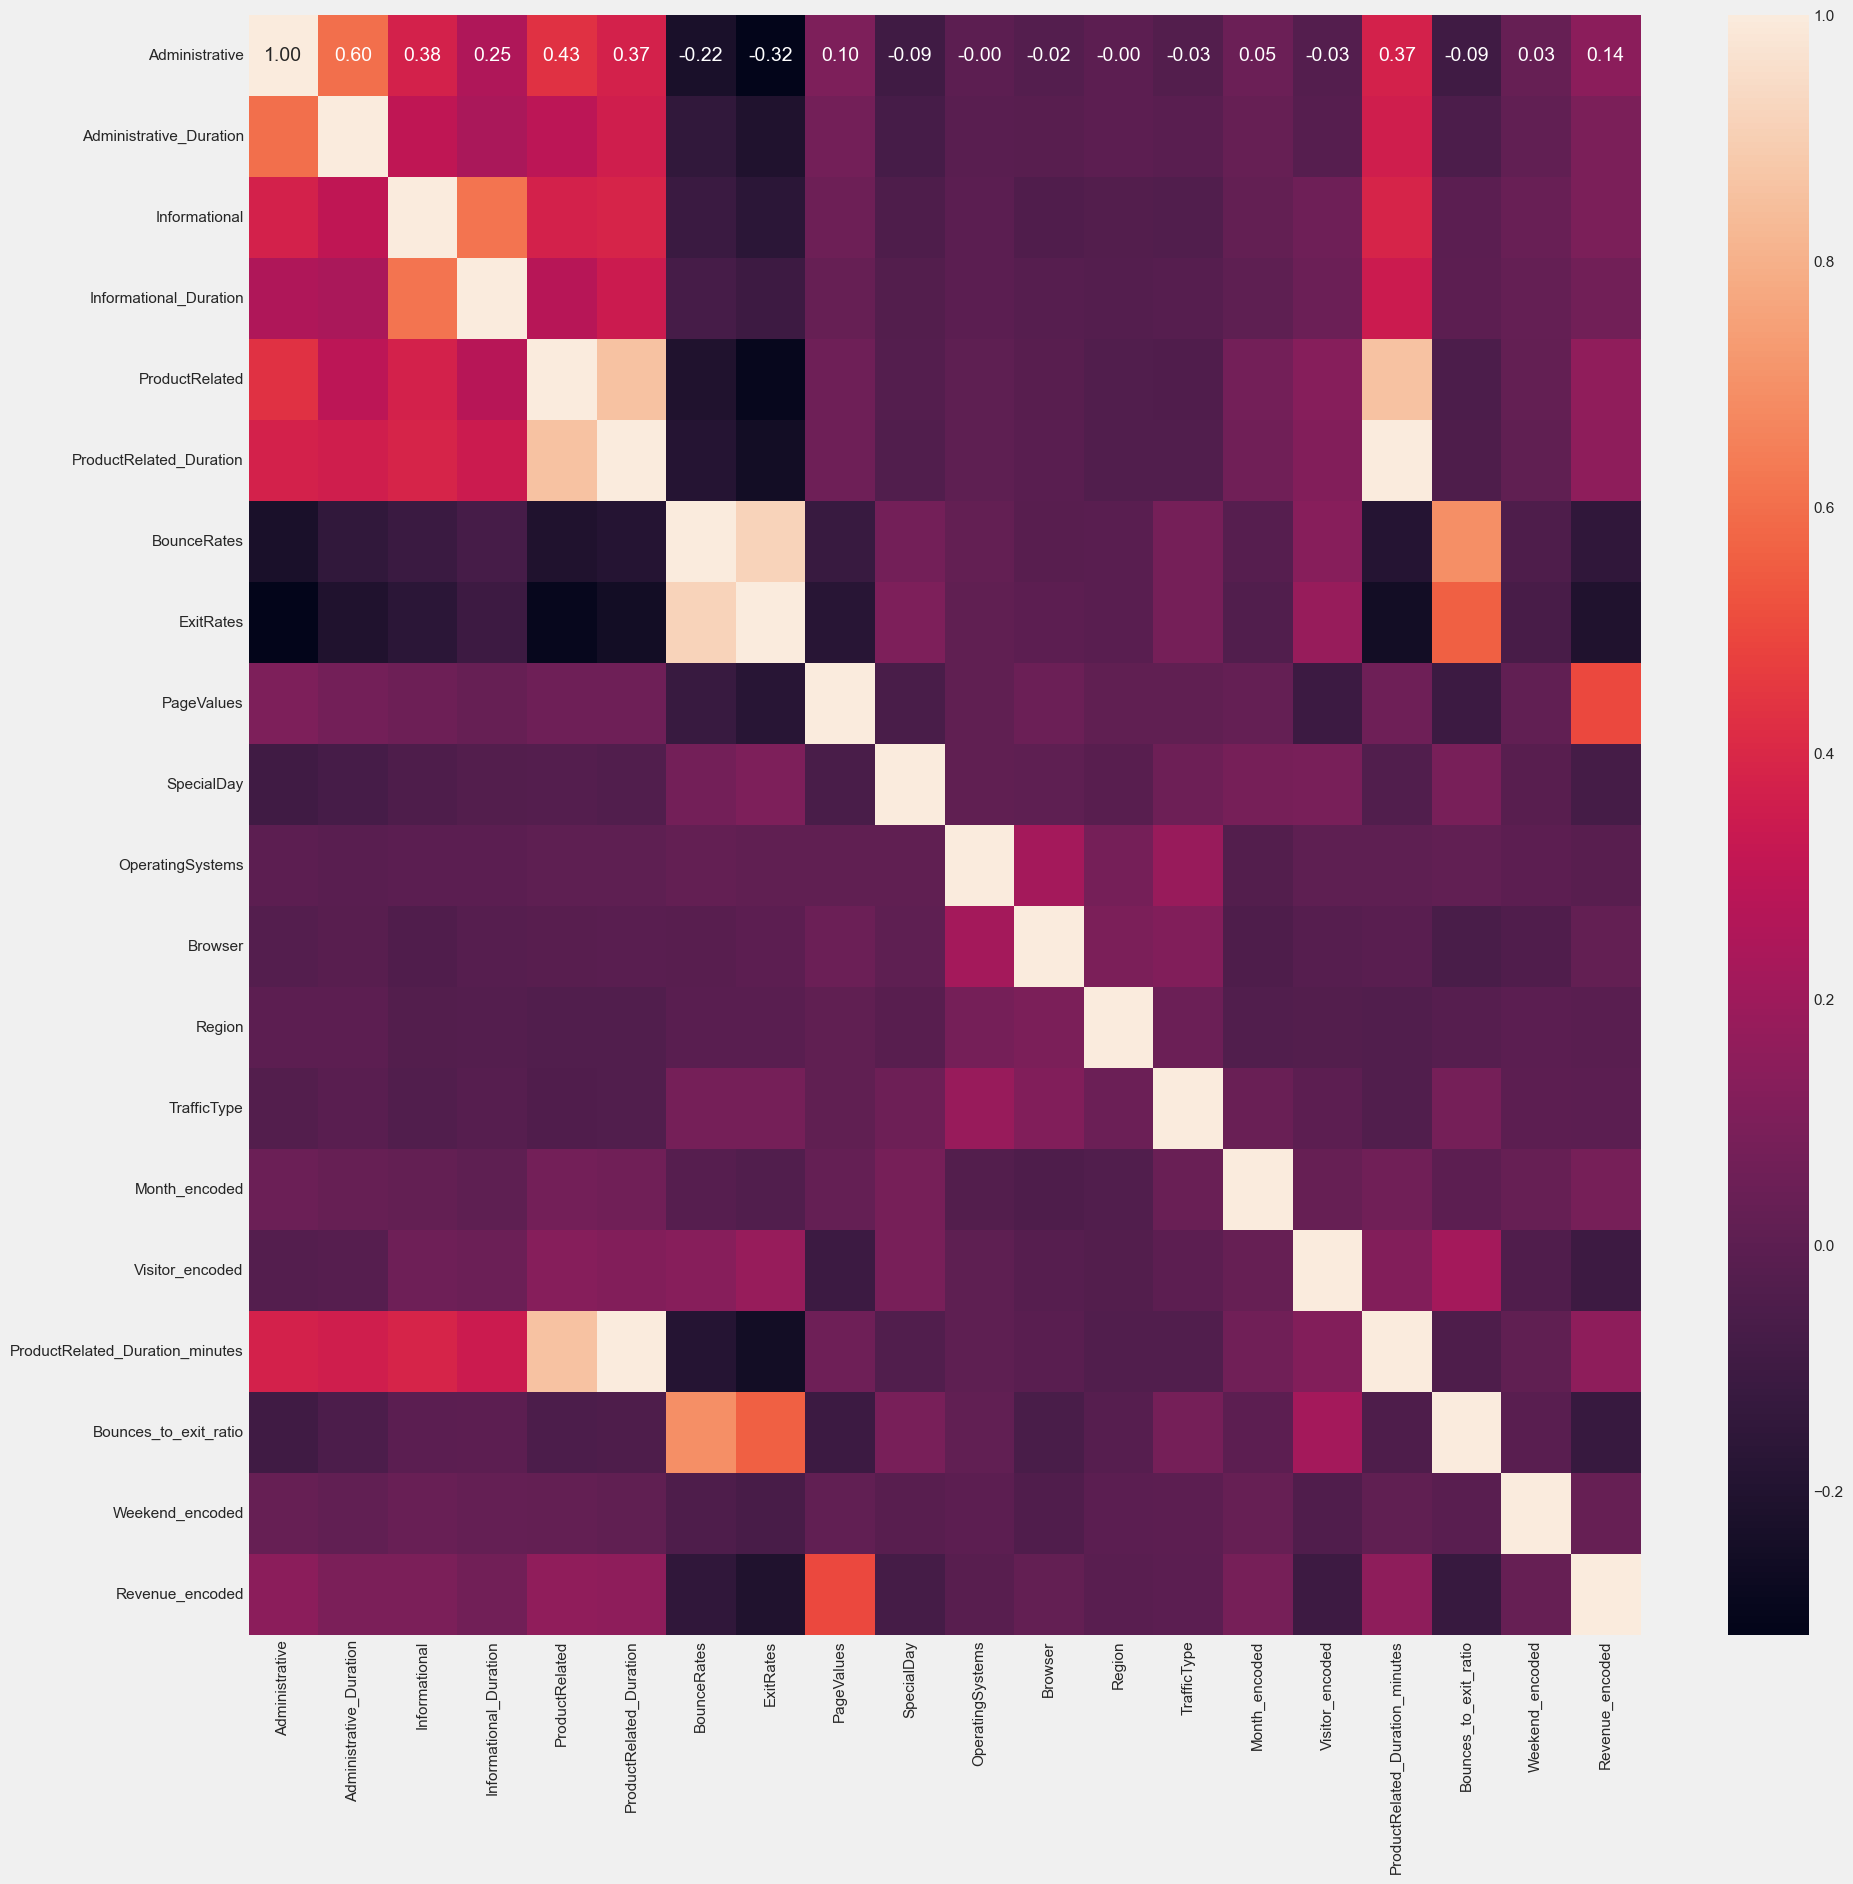

In [37]:
plt.figure(figsize=(20,20))
corr = df_ecom2[list_col_num].corr()

sns.heatmap(corr, annot=True, fmt='.2f')

## Insight Heat Map

Heatmap adalah visualisasi yang berguna untuk menampilkan hubungan atau korelasi antara dua set data. Korelasi antara fitur-fitur dengan fitur target (revenue) adalah sebagai berikut:
- PageValues dan Revenue memiliki nilai paling tinggi pertama yaitu 0.50:
Ini menunjukkan bahwa ada korelasi positif yang kuat antara fitur PageValues (nilai halaman) dan Revenue. Artinya, semakin tinggi nilai PageValues, semakin besar kemungkinan pengunjung akan menghasilkan pendapatan.
- ProductRelated dan Revenue memiliki nilai tinggi ke 2 yaitu 0.16:
Ini menunjukkan bahwa ada korelasi positif antara fitur ProductRelated (kunjungan terkait produk) dan Revenue, meskipun korelasinya tidak sekuat dengan PageValues.
- ProductRelated Duration dan Revenue memiliki nilai tinggi ke 3 yaitu 0.16:
Korelasi positif yang sama dengan ProductRelated juga terjadi antara ProductRelated Duration (durasi kunjungan terkait produk) dan Revenue.
- Exit Rate dan Revenue memiliki nilai paling rendah yaitu -0.21:
Ini menunjukkan bahwa ada korelasi negatif yang cukup kuat antara Exit Rate (tingkat keluar) dan Revenue. Artinya, semakin tinggi tingkat keluar, semakin kecil kemungkinan pengunjung akan menghasilkan pendapatan.
- Bounce Rate dan Revenue memiliki nilai rendah ke 2 yaitu -0.15:
Korelasi negatif juga terjadi antara Bounce Rate (tingkat pentalan) dan Revenue. Semakin tinggi tingkat pentalan, semakin kecil kemungkinan pengunjung akan menghasilkan pendapatan.
- Visitor Type (encoded) dan Revenue memiliki nilai rendah ke 3 yaitu -0.10:
Korelasi negatif antara Visitor Type (tipe pengunjung) dan Revenue menunjukkan bahwa jenis pengunjung tertentu mungkin memiliki dampak negatif terhadap pendapatan.

# Data Preprocessing

## Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah nilai kategorikal menjadi numerik
df_ecom['Month'] = label_encoder.fit_transform(df_ecom['Month'])
df_ecom['VisitorType'] = label_encoder.fit_transform(df_ecom['VisitorType'])
df_ecom['Weekend'] = label_encoder.fit_transform(df_ecom['Weekend'])
df_ecom['Revenue'] = label_encoder.fit_transform(df_ecom['Revenue'])

# Menampilkan DataFrame setelah perubahan
df_ecom.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1.0,1,1,1,2,0,0
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2.0,2,1,2,2,0,0
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4.0,1,9,3,2,0,0
3,0.0,NaN,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3.0,2,2,4,2,0,0
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3.0,3,1,4,2,1,0


## Duplicate rows

In [39]:
df_ecom.duplicated().sum()

711

#### There are a total of 711 duplicate rows
- A row is flagged as a duplicate when all its values across all columns match the values of another row or rows in the DataFrame.
- Duplicate rows are typically dropped upon discovery since they contains the same values with other rows and might cause bias.

In [40]:
df_ecom = df_ecom.drop_duplicates()

## Missing Values

In [41]:
X = df_ecom.drop(columns='Revenue', axis=1)
y = df_ecom['Revenue']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9788, 17), (2447, 17), (9788,), (2447,))

In [43]:
miscol_temp = pd.DataFrame(columns=['Columns','Num_train'])
miscol_temp_test = pd.DataFrame(columns=['Columns','Num_test'])

In [44]:
for col in X_train.columns:
    col_misval = X_train[col].isna().sum()
    if col_misval > 0:
        miscol_temp.loc[len(miscol_temp)] = [col, col_misval]
        
for col in X_test.columns:
    col_misval = X_test[col].isna().sum()
    if col_misval > 0:
        miscol_temp_test.loc[len(miscol_temp_test)] = [col, col_misval]

In [45]:
# merge the two dataset
merged_misval_df = pd.merge(miscol_temp, miscol_temp_test, on='Columns', how='inner').sort_values(by=['Num_train'], ascending=False)

merged_misval_df

,Columns,Num_train,Num_test
2,ProductRelated_Duration,490,112
1,Administrative_Duration,479,115
4,OperatingSystems,412,95
0,Administrative,82,24
3,BounceRates,54,15


#### There are a total of 5 columns with missing value
- Administrative
- Administrative_Duration
- ProductRelated_Duration
- BounceRates
- OperatingSystems

### Handling missing values

In [46]:
# the missing values in columns 'Administrative','Administrative_Duration','ProductRelated_Duration' is replaced by 0.
# the assumptions is visitor did not visit administrative page, thus result in 0 seconds spent on the page.
# and the visitor did not spent time browsing through product related page thus result in 0 seconds spent on the page.
for col in ['Administrative','Administrative_Duration','ProductRelated_Duration']:
    X_train[col] = X_train[col].fillna(0)
    X_test[col] = X_test[col].fillna(0)

In [47]:
# the column BounceRates is replaced by it's average values
# this is done because the mean and std doesn't have much difference in values.
# which could also mean lack of outliers
X_train['BounceRates'] = X_train['BounceRates'].fillna(X_train['BounceRates'].mean())
X_test['BounceRates'] = X_test['BounceRates'].fillna(X_test['BounceRates'].mean())

# the column OperatingSystems is replaced by it's most frequent value
X_train['OperatingSystems'] = X_train['OperatingSystems'].fillna(X_train['OperatingSystems'].mode().loc[0])
X_test['OperatingSystems'] = X_test['OperatingSystems'].fillna(X_test['OperatingSystems'].mode().loc[0])

In [48]:
X_train.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [49]:
X_test.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9788, 17), (2447, 17), (9788,), (2447,))

## Handling Outliers

In [51]:
df_outlier_train = pd.DataFrame(columns=['Features','Train_upper_outlier'])
df_outlier_test = pd.DataFrame(columns=['Features','Test_upper_outlier'])

In [52]:
def outlier_values(df, df_output):
    for col in X_train:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier = (Q3 + 1.5 * IQR)
        if outlier > 0:
            df_output.loc[len(df_output)] = [col, outlier.round(2)]

In [53]:
outlier_values(X_train, df_outlier_train)
df_outlier_train

,Features,Train_upper_outlier
0,Administrative,10.00
1,Administrative_Duration,221.50
2,ProductRelated,84.50
3,ProductRelated_Duration,3291.30
4,BounceRates,0.04
5,ExitRates,0.10
6,Month,10.00
7,OperatingSystems,2.00
8,Browser,2.00
9,Region,8.50


In [54]:
outlier_values(X_test, df_outlier_test)
df_outlier_test

,Features,Test_upper_outlier
0,Administrative,10.00
1,Administrative_Duration,220.00
2,ProductRelated,83.00
3,ProductRelated_Duration,3445.17
4,BounceRates,0.04
5,ExitRates,0.10
6,Month,11.50
7,OperatingSystems,2.00
8,Browser,2.00
9,Region,8.50


In [55]:
# merge the two dataset
merged_outlier_df = pd.merge(df_outlier_train, df_outlier_test, on='Features', how='inner').sort_values(by=['Train_upper_outlier'], ascending=False)

merged_outlier_df

,Features,Train_upper_outlier,Test_upper_outlier
3,ProductRelated_Duration,3291.30,3445.17
1,Administrative_Duration,221.50,220.00
2,ProductRelated,84.50,83.00
0,Administrative,10.00,10.00
6,Month,10.00,11.50
9,Region,8.50,8.50
10,TrafficType,7.00,7.00
7,OperatingSystems,2.00,2.00
8,Browser,2.00,2.00
11,VisitorType,2.00,2.00


In [56]:
df_perc_temp = pd.DataFrame(columns=['Features','Train_outlier_percentages','Test_outlier_percentages'])

In [57]:
for index, row in merged_outlier_df.iterrows():
    train_outlier_val = row['Train_upper_outlier']
    test_outlier_val = row['Test_upper_outlier']
    
    train_outlier_count = X_train[row['Features']] > train_outlier_val
    test_outlier_count = X_test[row['Features']] > test_outlier_val
    
    train_outlier_percentage = round(train_outlier_count.sum()/len(X_train)*100,2)
    test_outlier_percentage = round(test_outlier_count.sum()/len(X_test)*100,2)
    
    df_perc_temp.loc[len(df_perc_temp)] = [row['Features'], train_outlier_percentage, test_outlier_percentage]

In [58]:
df_perc_temp.sort_values('Train_outlier_percentages', ascending=False)

,Features,Train_outlier_percentages,Test_outlier_percentages
7,OperatingSystems,24.38,24.52
6,TrafficType,17.08,17.00
8,Browser,15.53,15.37
11,BounceRates,11.90,12.38
1,Administrative_Duration,9.78,10.22
10,ExitRates,8.28,8.46
2,ProductRelated,7.89,8.95
0,ProductRelated_Duration,7.75,7.48
5,Region,4.09,4.29
3,Administrative,3.16,3.72


#### Notes:
- There are 10 features containing outliers, 2 of which (Month, VisitorType) have close to zero values beyond their upper outlier threshold.
- There are 3 features with the highest percentages of outliers, which are "TrafficType," "BounceRates," and "Administrative_Duration," with more than 10% of their values as outliers. This indicates that a significant number of data points fall outside the expected range of the majority of the data in a column. This would suggests that the central tendency (mean, median) of the features is highly distorted.
- According to National Institute of Standards and Technology, any values that exceed the upper inner fence of outliers (Q3 + 1.5*IQR) are considered to be mild outliers.

In [59]:
transform_train = X_train.skew() > 1

# Do log transformation
X_train.loc[:, transform_train] = X_train.loc[:, transform_train].apply(lambda x: np.log1p(x))

# Apply the same transformation to the testing set (to maintain consistency)
X_test.loc[:, transform_train] = X_test.loc[:, transform_train].apply(lambda x: np.log1p(x))

# Display the transformed DataFrames
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,9788.0,0.798990,0.860840,0.000000,0.000000,0.693147,1.609438,3.295837
Administrative_Duration,9788.0,2.226090,2.359143,0.000000,0.000000,1.386294,4.495367,8.131457
Informational,9788.0,0.239039,0.494848,0.000000,0.000000,0.000000,0.000000,3.218876
Informational_Duration,9788.0,0.856666,1.826609,0.000000,0.000000,0.000000,0.000000,7.843996
ProductRelated,9788.0,2.896130,1.111301,0.000000,2.079442,2.944439,3.663562,6.559615
ProductRelated_Duration,9788.0,5.709474,2.328519,0.000000,4.989014,6.314152,7.247790,11.066240
BounceRates,9788.0,0.019508,0.042017,0.000000,0.000000,0.003003,0.016529,0.182322
ExitRates,9788.0,0.039996,0.042896,0.000000,0.014159,0.024693,0.047445,0.182322
PageValues,9788.0,0.629828,1.275214,0.000000,0.000000,0.000000,0.000000,5.893752
SpecialDay,9788.0,0.046824,0.148067,0.000000,0.000000,0.000000,0.000000,0.693147


In [60]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,2447.0,0.781555,0.869289,0.000000,0.000000,0.693147,1.609438,3.332205
Administrative_Duration,2447.0,2.182953,2.371672,0.000000,0.000000,0.000000,4.488636,7.786728
Informational,2447.0,0.237539,0.505695,0.000000,0.000000,0.000000,0.000000,2.564949
Informational_Duration,2447.0,0.827771,1.803138,0.000000,0.000000,0.000000,0.000000,7.333676
ProductRelated,2447.0,2.927402,1.113592,0.000000,2.197225,2.995732,3.663562,6.532334
ProductRelated_Duration,2447.0,5.742624,2.337354,0.000000,5.041799,6.344056,7.293913,10.120418
BounceRates,2447.0,0.020112,0.042429,0.000000,0.000000,0.003472,0.017493,0.182322
ExitRates,2447.0,0.040288,0.042813,0.000000,0.014185,0.025201,0.048790,0.182322
PageValues,2447.0,0.625545,1.256954,0.000000,0.000000,0.000000,0.000000,5.605010
SpecialDay,2447.0,0.048248,0.150183,0.000000,0.000000,0.000000,0.000000,0.693147


In [61]:
transformed_outlier_train = pd.DataFrame(columns=['Features','Train_upper_outlier'])
transformed_outlier_test = pd.DataFrame(columns=['Features','Test_upper_outlier'])

In [62]:
outlier_values(X_train, transformed_outlier_train)
outlier_values(X_test, transformed_outlier_test)

In [63]:
# merge the two dataset
merged_outlier_transformed = pd.merge(transformed_outlier_train, transformed_outlier_test, on='Features', how='inner').sort_values(by=['Train_upper_outlier'], ascending=False)

merged_outlier_transformed

,Features,Train_upper_outlier,Test_upper_outlier
1,Administrative_Duration,11.24,11.22
3,ProductRelated_Duration,10.64,10.67
6,Month,10.00,11.50
9,Region,8.50,8.50
2,ProductRelated,6.04,5.86
0,Administrative,4.02,4.02
10,TrafficType,2.38,2.38
11,VisitorType,2.00,2.00
7,OperatingSystems,1.10,1.10
8,Browser,1.10,1.10


In [64]:
perc_outlier_transformed = pd.DataFrame(columns=['Features','Train_outlier_percentages','Test_outlier_percentages'])

In [65]:
for index, row in merged_outlier_transformed.iterrows():
    train_outlier_val = row['Train_upper_outlier']
    test_outlier_val = row['Test_upper_outlier']
    
    train_outlier_count = X_train[row['Features']] > train_outlier_val
    test_outlier_count = X_test[row['Features']] > test_outlier_val
    
    train_outlier_percentage = round(train_outlier_count.sum()/len(X_train)*100,2)
    test_outlier_percentage = round(test_outlier_count.sum()/len(X_test)*100,2)

    if train_outlier_percentage > 0 and test_outlier_percentage > 0:
        perc_outlier_transformed.loc[len(perc_outlier_transformed)] = [row['Features'], train_outlier_percentage, test_outlier_percentage]

In [66]:
perc_outlier_transformed.sort_values('Train_outlier_percentages', ascending=False)

,Features,Train_outlier_percentages,Test_outlier_percentages
3,OperatingSystems,24.38,24.52
4,Browser,15.53,15.37
2,TrafficType,13.93,13.94
6,BounceRates,11.87,12.38
5,ExitRates,8.13,8.26
0,Region,4.09,4.29
1,ProductRelated,0.10,0.33


#### Notes:
- Out of 10 features, There are only 5 features left with the presence of outliers, with 4 features (TrafficType, BounceRates, ExitRates, Region) is still has a fairly high percentages of outliers, and 1 feature (ProductRelated) is close to zero percent.
- Logarithmic transformation manages to reduce 5 out of 10 features to very close to zero percent, which are promptly excluded.

In [67]:
from scipy.stats.mstats import winsorize

for col in perc_outlier_transformed['Features']:
    X_train[col] = winsorize(X_train[col], limits=[0.15, 0.15])
    X_test[col] = winsorize(X_test[col], limits=[0.15, 0.15])

In [68]:
perc_outlier_transformed = pd.DataFrame(columns=['Features','Train_outlier_percentages','Test_outlier_percentages'])

In [69]:
for index, row in merged_outlier_transformed.iterrows():
    train_outlier_val = row['Train_upper_outlier']
    test_outlier_val = row['Test_upper_outlier']
    
    train_outlier_count = X_train[row['Features']] > train_outlier_val
    test_outlier_count = X_test[row['Features']] > test_outlier_val
    
    train_outlier_percentage = round(train_outlier_count.sum()/len(X_train)*100,2)
    test_outlier_percentage = round(test_outlier_count.sum()/len(X_test)*100,2)

    if train_outlier_percentage > 0 and test_outlier_percentage > 0:
        perc_outlier_transformed.loc[len(perc_outlier_transformed)] = [row['Features'], train_outlier_percentage, test_outlier_percentage]

In [70]:
perc_outlier_transformed.sort_values('Train_outlier_percentages', ascending=False)

,Features,Train_outlier_percentages,Test_outlier_percentages
0,OperatingSystems,24.38,24.52
1,Browser,15.53,15.37


#### Notes:
- There are 2 features left that have outliers after using winsorization.
- By applying winsorization with the 15th and 85th percentile limits, this means that any values below the 15th percentile will be replaced with the value at the 15th percentile, and any values above the 85th percentile will be replaced with the value at the 85th percentile

## SMOTE
- Oversampling technique that helps to improve the performance of machine learning models by balancing the class distribution, particularly useful when the minority class is underrepresented.
- SMOTE works by creating synthetic examples from the minority class by interpolating between existing minority class instances.

In [71]:
from imblearn.over_sampling import SMOTE
#handle imbalance target using SMOTE
smt = SMOTE(random_state =2)
smt.fit(X_train, y_train)
X_smote, y_smote = smt.fit_resample(X_train, y_train)

#display row and column for data smote & data test
X_smote.shape, X_train.shape, y_smote.shape, y_test.shape

((16524, 17), (9788, 17), (16524,), (2447,))

# Features Engineering

### Numerical Column Selection
Column selection criteria for numerical data:
- No null values
- p-value < 0.05
- correlation coefficient <= 0.7

In [72]:
# Create new dataframe without column with dtypes 'object'
x_train_num = X_smote.select_dtypes(exclude='object')
x_train_num.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [73]:
x_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16524 entries, 0 to 16523
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           16524 non-null  float64
 1   Administrative_Duration  16524 non-null  float64
 2   Informational            16524 non-null  float64
 3   Informational_Duration   16524 non-null  float64
 4   ProductRelated           16524 non-null  float64
 5   ProductRelated_Duration  16524 non-null  float64
 6   BounceRates              16524 non-null  float64
 7   ExitRates                16524 non-null  float64
 8   PageValues               16524 non-null  float64
 9   SpecialDay               16524 non-null  float64
 10  Month                    16524 non-null  int32  
 11  OperatingSystems         16524 non-null  float64
 12  Browser                  16524 non-null  float64
 13  Region                   16524 non-null  int64  
 14  TrafficType           

In [76]:
# Use ANOVA to get the p-value
F_statistic, p_values = f_classif(x_train_num, y_smote)

#create dataframe 
df_anova = pd.DataFrame(data= {'Numerical Feature':x_train_num.columns.values,
                                'p-value': p_values.round(5)})

df_anova.shape

(17, 2)

In [77]:
df_anova

,Numerical Feature,p-value
0,Administrative,0.00000
1,Administrative_Duration,0.00000
2,Informational,0.00000
3,Informational_Duration,0.00000
4,ProductRelated,0.00000
5,ProductRelated_Duration,0.00000
6,BounceRates,0.00000
7,ExitRates,0.00000
8,PageValues,0.00000
9,SpecialDay,0.00000


In [78]:
#filter only column that has p-value < 0.05
temp_num_cols = df_anova[df_anova['p-value']<0.05]['Numerical Feature'].tolist()

print(f'Number of excluded columns: {len(df_anova)-len(temp_num_cols)}')

temp_num_cols

Number of excluded columns: 1


['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'VisitorType',
 'Weekend']

- 1 features (TrafficType) are dropped because their p-value is more than the 0.05 threshold criterion.

<Axes: >

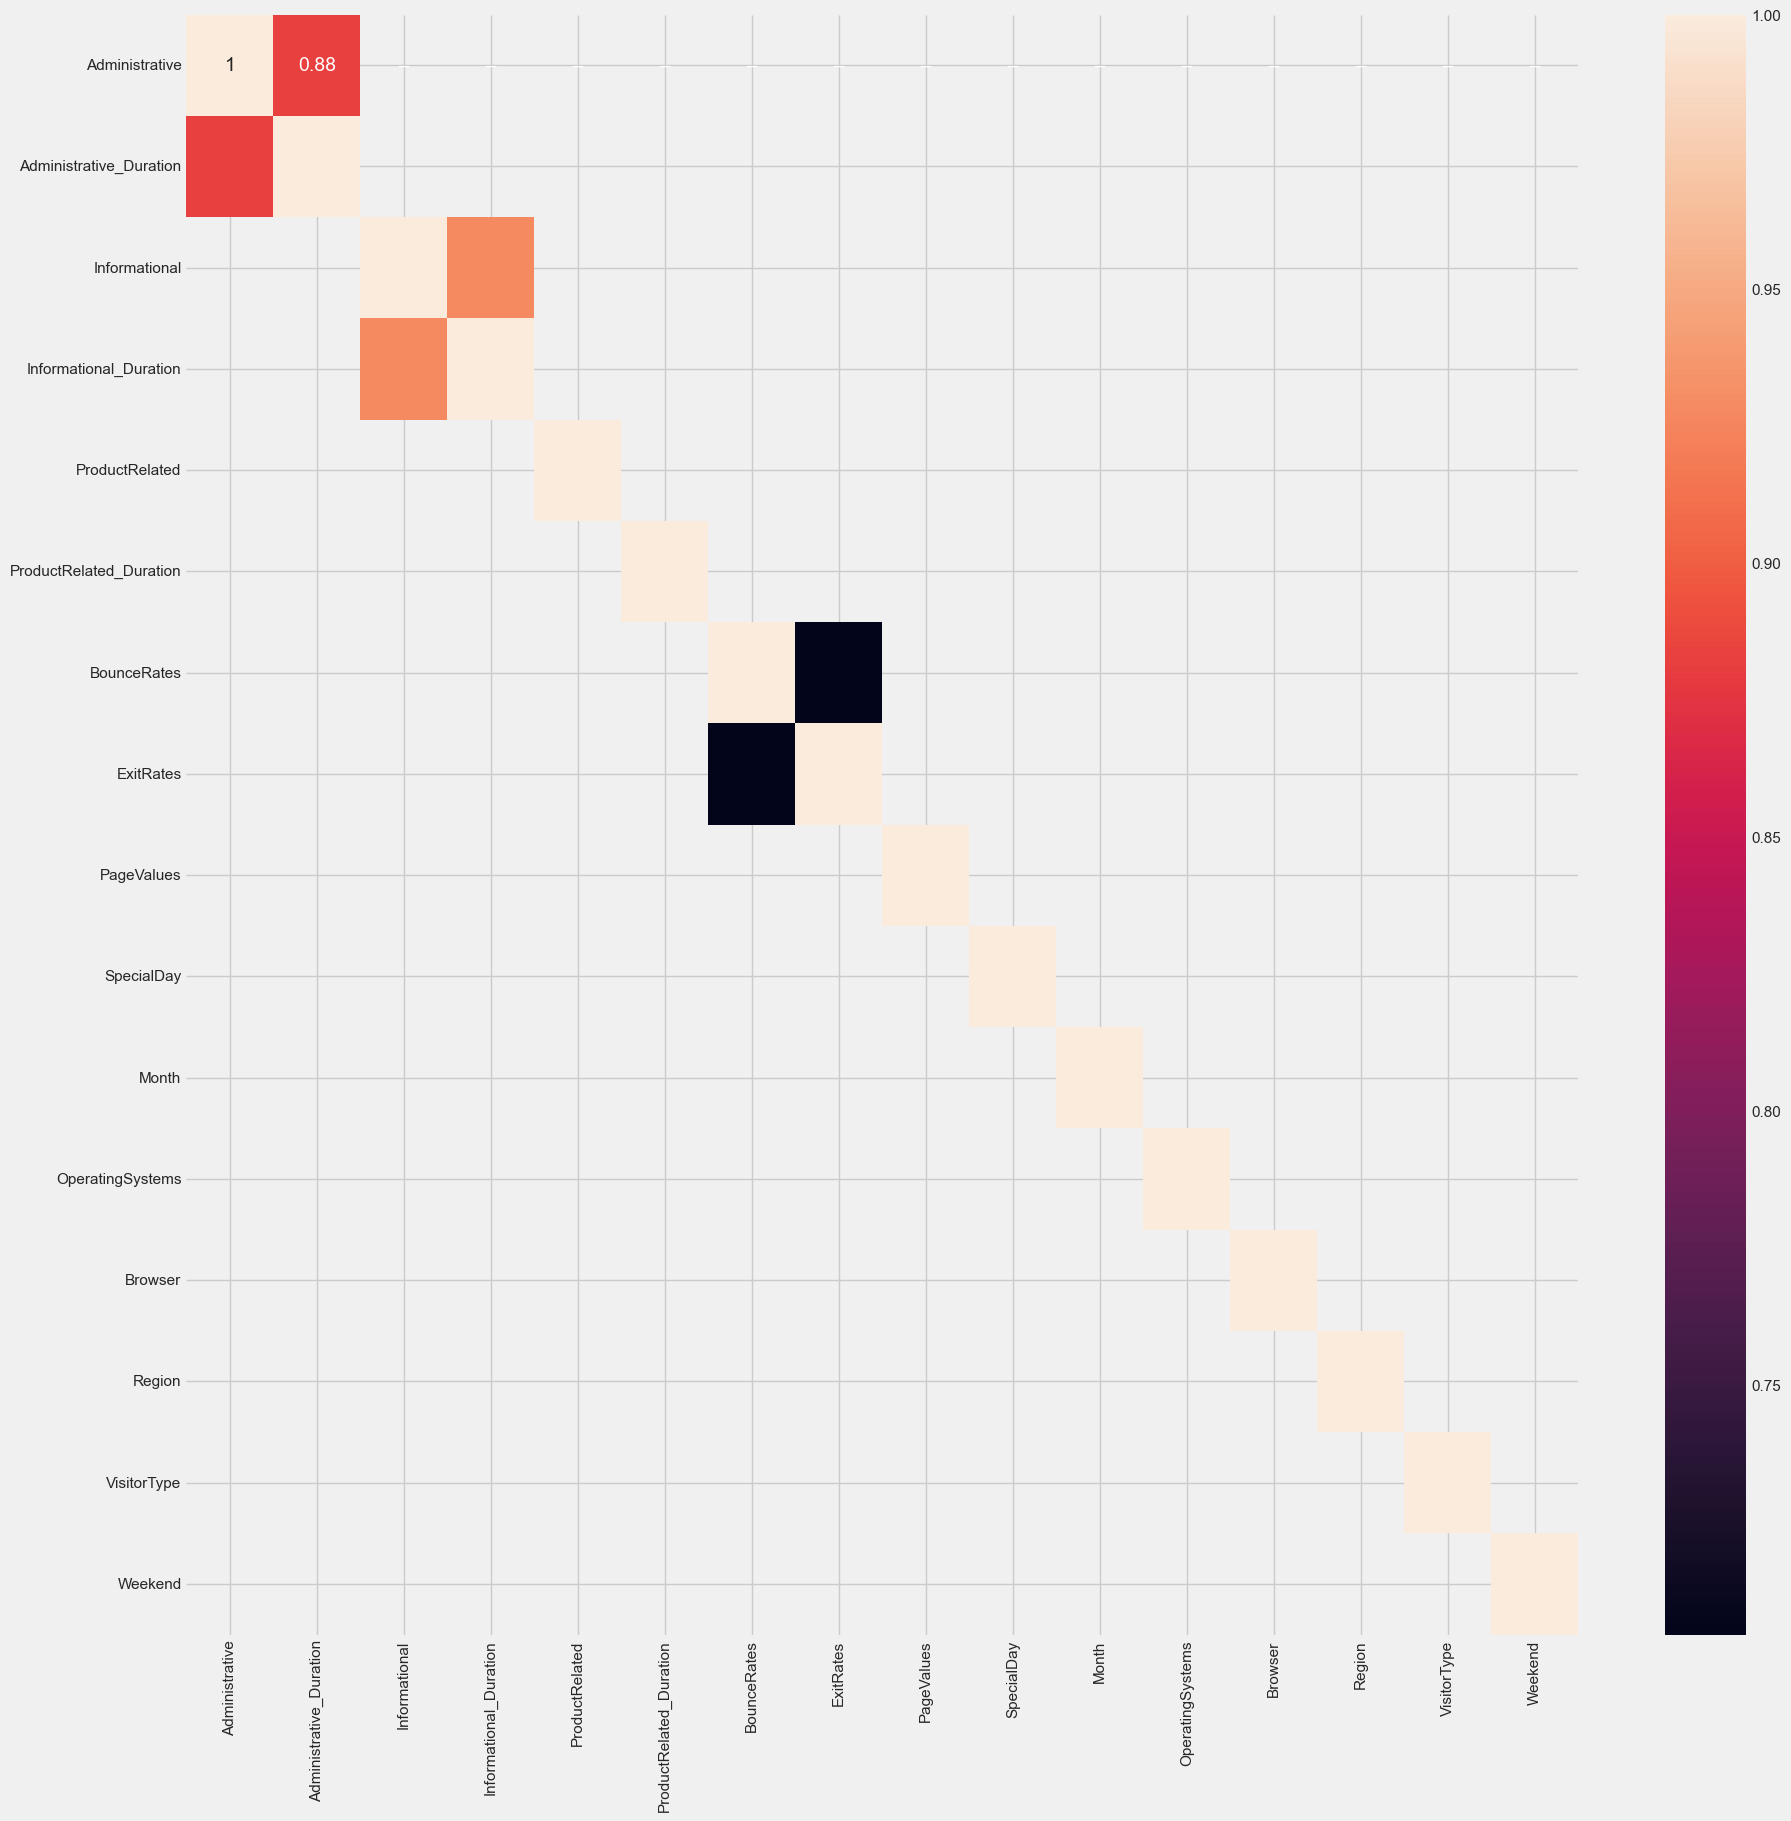

In [79]:
#select only the columns with correlation < 0.7
corr = X_smote[temp_num_cols].corr()
fig = plt.figure(figsize=(20,20))

# create heatmap to show correlation between features
sns.heatmap(corr, annot=True, mask=(abs(corr)<=0.7))

In [80]:
#create and apply mask
mask = corr.where(np.triu(np.ones(corr.shape, dtype = bool), k=1))

In [81]:
corr_selected_col = [col for col in mask.columns if any (mask[col] < 0.7)]

print(f'Number of excluded columns: {len(temp_num_cols)-len(corr_selected_col)}')

corr_selected_col

Number of excluded columns: 2


['Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'VisitorType',
 'Weekend']

- 2 features (Administrative, Administrative_Duration) are dropped because their correlation value is less than the 0.7 threshold criterion.

In [82]:
X_train_final = X_smote[corr_selected_col]
X_test_final = X_test[corr_selected_col]

In [83]:
X_train_final.shape, X_test_final.shape

((16524, 14), (2447, 14))

In [84]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16524 entries, 0 to 16523
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Informational            16524 non-null  float64
 1   Informational_Duration   16524 non-null  float64
 2   ProductRelated           16524 non-null  float64
 3   ProductRelated_Duration  16524 non-null  float64
 4   BounceRates              16524 non-null  float64
 5   ExitRates                16524 non-null  float64
 6   PageValues               16524 non-null  float64
 7   SpecialDay               16524 non-null  float64
 8   Month                    16524 non-null  int32  
 9   OperatingSystems         16524 non-null  float64
 10  Browser                  16524 non-null  float64
 11  Region                   16524 non-null  int64  
 12  VisitorType              16524 non-null  int32  
 13  Weekend                  16524 non-null  float64
dtypes: float64(11), int32(

## Drop unnecessary columns

In [85]:
# Visitor operating system and browser are judged to be irrelevant with the target feature.
unn_col = ['OperatingSystems', 'Browser']
for col in unn_col:
    X_train_final.drop(columns=col, axis=1, inplace=True)
    X_test_final.drop(columns=col, axis=1, inplace=True)

#### Notes:
- Column 'OperatingSystems' described as the operating system used by the visitor.
- Column 'Browser' described as the web browser used by the visitor

## Features Extraction

In [86]:
X_test_final.shape

(2447, 12)

In [87]:
def specialD(df):
    for index, row in df.iterrows():
        if row['SpecialDay'] <=0.2:
            df.at[index, 'SpecialD_Category'] = 'Close'
        elif row['SpecialDay'] <=0.4:
            df.at[index, 'SpecialD_Category'] = 'Moderate'
        elif row['SpecialDay'] <=1:
            df.at[index, 'SpecialD_Category'] = 'Far'
            
    df['SpecialD_Category'] = label_encoder.fit_transform(df['SpecialD_Category'])

specialD(X_train_final)
specialD(X_test_final)

In [88]:
X_train_final = X_train_final.drop(columns='SpecialDay', axis=1)
X_test_final = X_test_final.drop(columns='SpecialDay', axis=1)

In [89]:
X_train_final['Bounces_to_exit_ratio'] = X_train_final['BounceRates']/X_train_final['ExitRates']
X_test_final['Bounces_to_exit_ratio'] = X_train_final['BounceRates']/X_train_final['ExitRates']

In [90]:
extracted_col = ['BounceRates', 'ExitRates']
for col in extracted_col:
    X_train_final.drop(columns=col, axis=1, inplace=True)
    X_test_final.drop(columns=col, axis=1, inplace=True)

In [91]:
X_train_final['Bounces_to_exit_ratio'].describe()

count    16524.000000
mean         0.217717
std          0.251399
min          0.000000
25%          0.000000
50%          0.140275
75%          0.416389
max          2.479011
Name: Bounces_to_exit_ratio, dtype: float64

In [92]:
X_train_final.shape, X_test_final.shape

((16524, 11), (2447, 11))

In [93]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16524 entries, 0 to 16523
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Informational            16524 non-null  float64
 1   Informational_Duration   16524 non-null  float64
 2   ProductRelated           16524 non-null  float64
 3   ProductRelated_Duration  16524 non-null  float64
 4   PageValues               16524 non-null  float64
 5   Month                    16524 non-null  int32  
 6   Region                   16524 non-null  int64  
 7   VisitorType              16524 non-null  int32  
 8   Weekend                  16524 non-null  float64
 9   SpecialD_Category        16524 non-null  int32  
 10  Bounces_to_exit_ratio    16524 non-null  float64
dtypes: float64(7), int32(3), int64(1)
memory usage: 1.2 MB


In [94]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2447 entries, 5994 to 983
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Informational            2447 non-null   float64
 1   Informational_Duration   2447 non-null   float64
 2   ProductRelated           2447 non-null   float64
 3   ProductRelated_Duration  2447 non-null   float64
 4   PageValues               2447 non-null   float64
 5   Month                    2447 non-null   int32  
 6   Region                   2447 non-null   int64  
 7   VisitorType              2447 non-null   int32  
 8   Weekend                  2447 non-null   float64
 9   SpecialD_Category        2447 non-null   int32  
 10  Bounces_to_exit_ratio    2447 non-null   float64
dtypes: float64(7), int32(3), int64(1)
memory usage: 265.3 KB


# Modelling

5 initial classification models are used with default paramaters:
- Logistic Regression
- K-nearest Neighbor
- Decision Tree
- Random Forest
- XGBoost

In [97]:
def class_report(y_proba, y):
    y_pred_class = []

    for val in y_proba:
        if val > 0.5:
            y_pred_class.append(1)
        else:
            y_pred_class.append(0)
    
    print(classification_report(y_true = y, y_pred= y_pred_class))
    conf_matrix(y, y_pred_class)

def conf_matrix(y, y_pred):
    conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred)

    print(f"Test data Confusion Matrix:")
    print(conf_matrix,'\n')
    
ml_model = {'Logistic Regression':LogisticRegression(),
            'K-Nearest Neighbor':KNeighborsClassifier(),
            'Decision Tree':DecisionTreeClassifier(),
            'Random Forest':RandomForestClassifier(),
            'XGB':XGBRegressor()}

for model_name, model_used in ml_model.items():
    model_used.fit(X_train_final, y_smote)
    if model_name != 'XGB':
        y_pred_proba_train = model_used.predict_proba(X_train_final)[:][:,1]
        y_pred_proba_test = model_used.predict_proba(X_test_final)[:][:,1]
    else:
        y_pred_proba_train = model_used.predict(X_train_final)
        y_pred_proba_test = model_used.predict(X_test_final)
        
    print(f'{model_name} AUC train probability: ', roc_auc_score(y_true= y_smote , y_score= y_pred_proba_train).round(4))
    print(f'{model_name} AUC test probability: ', roc_auc_score(y_true= y_test , y_score= y_pred_proba_test).round(4))

    class_report(y_pred_proba_test, y_test)

Logistic Regression AUC train probability:  0.9051
Logistic Regression AUC test probability:  0.9023
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2065
           1       0.58      0.80      0.67       382

    accuracy                           0.88      2447
   macro avg       0.77      0.85      0.80      2447
weighted avg       0.90      0.88      0.89      2447

Test data Confusion Matrix:
[[1842  223]
 [  76  306]] 

K-Nearest Neighbor AUC train probability:  0.9861
K-Nearest Neighbor AUC test probability:  0.8629
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2065
           1       0.47      0.79      0.59       382

    accuracy                           0.83      2447
   macro avg       0.71      0.81      0.74      2447
weighted avg       0.88      0.83      0.84      2447

Test data Confusion Matrix:
[[1718  347]
 [  80  302]] 

Decision Tree AUC train probabil

#### Notes:
#### AUC
- AUC (Area Under Curve) according to (Narkhede, 2018) is a performance measurement or metric used to evaluate the performance of classification models.
- Higher AUC value indicates better class separation, as the model is able to distinguish between the positive and negative classes more effectively.
- AUC > 0.8: Generally is considered a good performance.
- AUC > 0.9: Is considered a very good performance.
- AUC < 0.5: Indicates the model performs no better than random.

#### Confusion matrix
To maximize revenue using the prediction results, it's generally better to consider both true positives (visitors correctly predicted to generate revenue) and false negatives (visitors incorrectly predicted to not generate revenue). This would helps in avoiding potential losses on paying customers while also potentially converting non-paying customer to paying customer.

#### Insight:
- On average, the five models can identify visitors who will generate revenue (1) with only 53.2% precision. The top performing models, Logistic Regression, Random Forest, and XGBoost, achieve slightly better prevision at around 58%. However, these models excel at identifying visitors who will not generate revenue (0), with an average precision of 94.6%.
- All models except the decision tree can be considered to have a good recall score (greater than 0.70) for visitors who generate revenue. This indicates that the models were able to identify a good portion of visitors who actually generate revenue for the site.
- The top performing models, Logistic Regression, Random Forest, and XGBoost manages to have a fairly moderate f1-score on class (1) which indicates the harmonized score between precision and recall of the models manages to correctly identifies a good portion visitor that would generate revenue.
- Across all models, the accuracy scores are good and consistent, with an average of 85.8%. This suggests that the models are generally effective at making accurate predictions, although the top performers excel even further in this area with each are well above the total average.
- 0.9 AUC score from the top performing models on both train & test probability suggest that the models performance considered to be very good, and is effective at distinguishing between the positive and negative classes.
- The true positive to false negative ratio indicates that, on average, the models can identify paying customers (TP) 18.6 times more often than they miss them (FN). This suggests a strong ability to capture potential revenue.

## Hypertuning

Based on the evaluation results of five different classification models, considering the scores for precision, recall, and accuracy, it has been determined that the following models are the three top-performing models that will be hypertuned:
- Logistic Regression
- Random Forest
- XGBoost

### Logistic Regression

In [99]:
#Membuat dictionary jarak nilai parameter C
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'saga'],
    'class_weight': [None, 'balanced']
}

#Membuat LogisticRegression
model = LogisticRegression()

#Melakukan gridsearch
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_final, y_smote)

#Assign value terbaik C
#best_C = grid_search.best_params_['C']
best_params = grid_search.best_params_

#Membuat model baru dengan param C
best_model = LogisticRegression(**best_params)

print(f'Parameters used: {best_params}')

Parameters used: {'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}


In [100]:
#Latih model
best_model.fit(X_train_final, y_smote)

y_pred_proba_train_hyp = best_model.predict_proba(X_train_final)[:][:,1]
y_pred_proba_test_hyp = best_model.predict_proba(X_test_final)[:][:,1]

#AUC - ROC curve is a performance measurement for the classification problems at various threshold settings
print('AUC train probability: ', roc_auc_score(y_true= y_smote , y_score= y_pred_proba_train_hyp))
print('AUC test probability: ', roc_auc_score(y_true= y_test , y_score= y_pred_proba_test_hyp))

AUC train probability:  0.9037580937560448
AUC test probability:  0.8989953475400276


In [101]:
y_pred_class_hyp_logreg = []

for val in y_pred_proba_test_hyp:
    if val > 0.5:
        y_pred_class_hyp_logreg.append(1)
    else:
        y_pred_class_hyp_logreg.append(0)

print(classification_report(y_true = y_test, y_pred= y_pred_class_hyp_logreg))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2065
           1       0.59      0.80      0.68       382

    accuracy                           0.88      2447
   macro avg       0.77      0.85      0.80      2447
weighted avg       0.90      0.88      0.89      2447



In [102]:
conf_matrix(y_test, y_pred_class_hyp_logreg)

Test data Confusion Matrix:
[[1850  215]
 [  77  305]] 



#### Insight:
- Hypertuning Logistic Regression model with the best parameter possible resulted in increase of precision and f1-score for class (1) by 0.01 which is not significant.
- Confusion matrix shows little to no increase.

### Random Forest

In [103]:
# Create a Random Forest model
random_f = RandomForestClassifier(max_features= 'log2', min_samples_leaf= 2, min_samples_split= 0.1, n_estimators= 500, verbose=True, criterion='entropy')

random_f.fit(X_train_final, y_smote)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.6s finished


RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=2, min_samples_split=0.1,
                       n_estimators=500, verbose=True)

In [104]:
y_pred_proba_train_hyp = random_f.predict_proba(X_train_final)[:][:,1]
y_pred_proba_test_hyp = random_f.predict_proba(X_test_final)[:][:,1]

#AUC - ROC curve is a performance measurement for the classification problems at various threshold settings
print('AUC train probability: ', roc_auc_score(y_true= y_smote , y_score= y_pred_proba_train_hyp))
print('AUC test probability: ', roc_auc_score(y_true= y_test , y_score= y_pred_proba_test_hyp))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AUC train probability:  0.9368188424943662
AUC test probability:  0.9036915431715324


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


In [105]:
y_pred_class_hyp_rf = []

for val in y_pred_proba_test_hyp:
    if val > 0.5:
        y_pred_class_hyp_rf.append(1)
    else:
        y_pred_class_hyp_rf.append(0)

print(classification_report(y_true = y_test, y_pred= y_pred_class_hyp_rf))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2065
           1       0.57      0.81      0.67       382

    accuracy                           0.88      2447
   macro avg       0.77      0.85      0.80      2447
weighted avg       0.90      0.88      0.88      2447



In [106]:
conf_matrix(y_test, y_pred_class_hyp_rf)

Test data Confusion Matrix:
[[1831  234]
 [  71  311]] 



#### Insight:
- Hypertuning the Random Forest model with the selected parameters led to an increase in the class (1) recall and f1-score values by 0.7 and 0.2, respectively.
- The confusion matrix indicates that the model performs better at predicting visitors who didn't generate revenue, although its ability to predict visitors who actually generate revenue has slightly decreased. While the increase in false positives may lead to some inefficiencies, they still represent potential revenue opportunities. False negatives, on the other hand, represent missed revenue opportunities and can have a more significant impact on overall revenue and would be better to be kept at lower number.

### XGBoost

In [107]:
XGB_model_hyp = XGBRegressor(n_estimators=100, learning_rate=0.3, max_depth=9)

# Train the model
XGB_model_hyp.fit(X_train_final, y_smote)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [108]:
y_pred_proba_train_hyp = model_used.predict(X_train_final)
y_pred_proba_test_hyp = model_used.predict(X_test_final)

print(f'{model_name} AUC train probability: ', roc_auc_score(y_true= y_smote , y_score= y_pred_proba_train).round(4))
print(f'{model_name} AUC test probability: ', roc_auc_score(y_true= y_test , y_score= y_pred_proba_test).round(4))

XGB AUC train probability:  0.9955
XGB AUC test probability:  0.8946


In [109]:
y_pred_class_hyp_xgb = []

for val in y_pred_proba_test_hyp:
    if val > 0.5:
        y_pred_class_hyp_xgb.append(1)
    else:
        y_pred_class_hyp_xgb.append(0)

print(classification_report(y_true = y_test, y_pred= y_pred_class_hyp_xgb))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2065
           1       0.58      0.71      0.64       382

    accuracy                           0.87      2447
   macro avg       0.76      0.81      0.78      2447
weighted avg       0.89      0.87      0.88      2447



In [110]:
conf_matrix(y_test, y_pred_class_hyp_xgb)

Test data Confusion Matrix:
[[1868  197]
 [ 112  270]] 



#### Insight:
- Hypertuning the XGBoost model with the selected parameters led to an increase in the class (1) recall and f1-score values by 1 and 0.3, respectively.
- The confusion matrix shows the same patern of changes as the random forest model, this would also indicates that the model performs better at predicting visitors who didn't generate revenue, while having slight decrease in predicting actual visitors who generate revenue.

## Feature importances

In [111]:
feature_importances = XGB_model_hyp.feature_importances_

In [112]:
# Create new dataframe for top 5 feature
imp_fts = pd.DataFrame(columns=['Features','importance'])

In [113]:
# Get and sort feature importances with the feature names
sorted_importances = sorted(zip(X_test_final.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Assign each features alongside it's importance values into the previously created dataframe
for feature, importance in sorted_importances[:5]:
    imp_fts.loc[len(imp_fts)] = [feature, importance]

In [114]:
print('Top 5 Feature Importances:')
imp_fts

Top 5 Feature Importances:


,Features,importance
0,PageValues,0.423159
1,Weekend,0.121146
2,Month,0.118357
3,VisitorType,0.083263
4,Bounces_to_exit_ratio,0.044169


Text(0.5, 1.0, 'Top 5 Highest Features Importance')

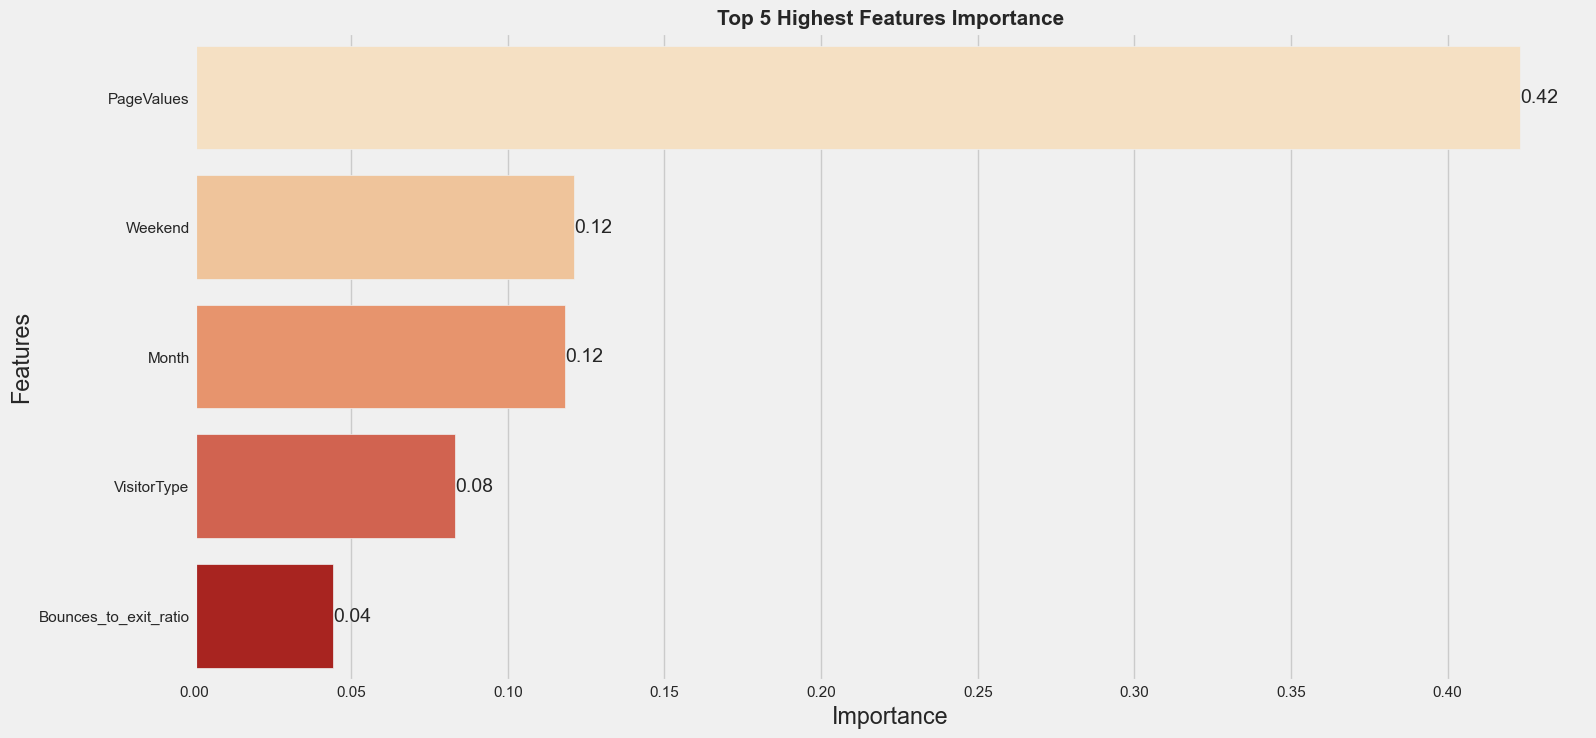

In [115]:
# Create barplot for top 5
ax_hbartype_gr = sns.barplot(y='Features', x='importance',data=imp_fts, palette='OrRd', orient='horizontal')

# Formatting plot
plt.bar_label(ax_hbartype_gr.containers[0], fmt='%.2f')
plt.xlabel('Importance')
plt.title('Top 5 Highest Features Importance', fontsize=15, weight ='extra bold')

#### Insight:
- 5 column are found with the highest importance value, which suggest that these columns are likely to be the highest determining factor in predicting visitor as potential buyer as the target features.
- The usage of the these top 5 features as the predictor would possibly suggest better result when it comes to predicting the target feature.

In [116]:
# Create new dataframe for top 5 feature
bott_imp_fts = pd.DataFrame(columns=['Features','importance'])

# Get and sort feature importances with the feature names
bott_sorted_importances = sorted(zip(X_test_final.columns, feature_importances), key=lambda x: x[1], reverse=False)

# Assign each features alongside it's importance values into the previously created dataframe
for feature, importance in bott_sorted_importances[:5]:
    bott_imp_fts.loc[len(bott_imp_fts)] = [feature, importance]

In [117]:
# Create dataframe for the bottom 5 features
bott_imp_fts = bott_imp_fts.sort_values('importance',ascending=False)
bott_imp_fts

,Features,importance
4,Region,0.039780
3,ProductRelated,0.035149
2,ProductRelated_Duration,0.033984
1,Informational_Duration,0.030528
0,Informational,0.027094


Text(0.5, 1.0, 'Top 5 Lowest Features Importance')

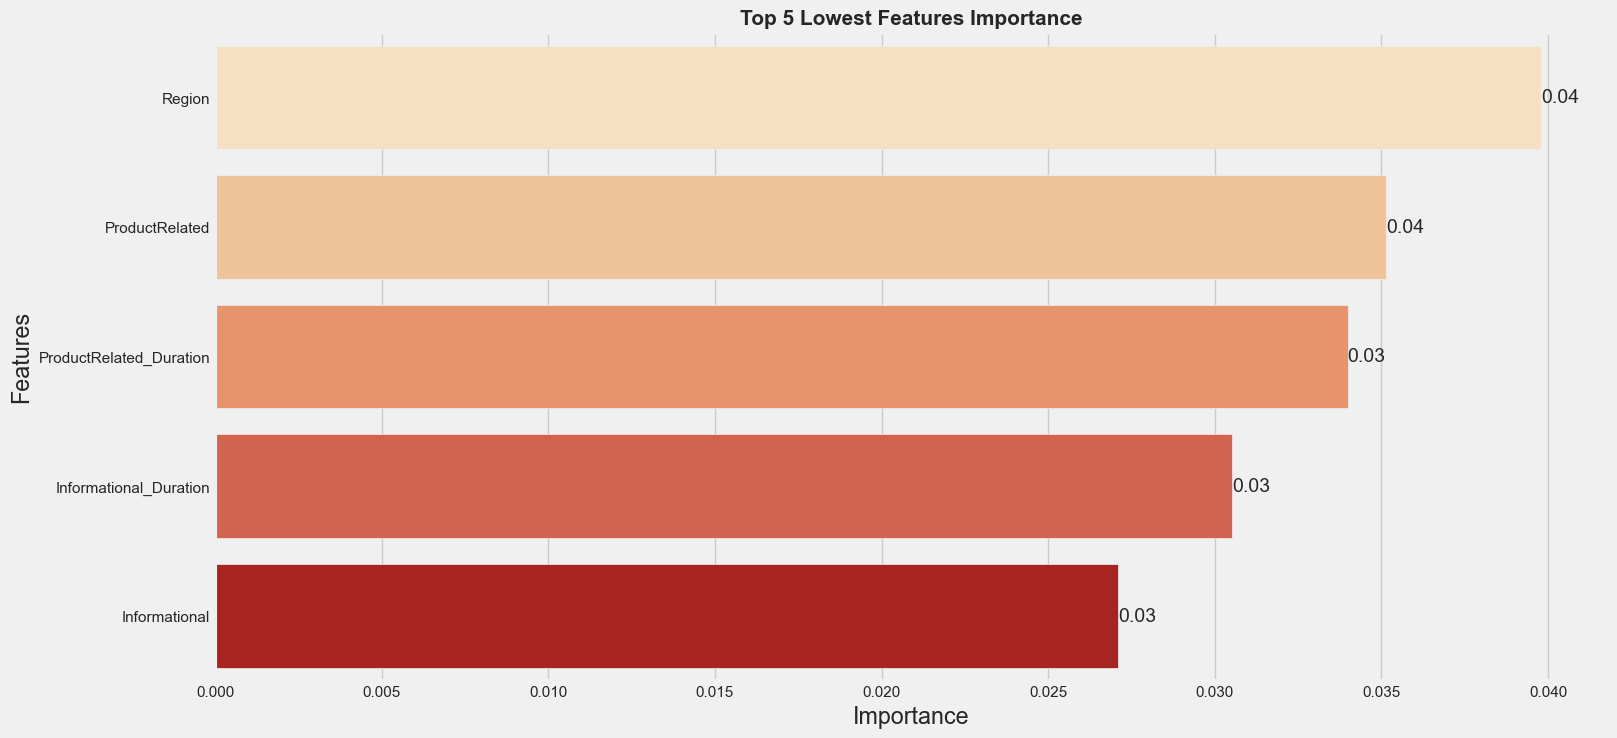

In [118]:
# Create barplot for bottom 5
ax_imp_fts = sns.barplot(y='Features', x='importance',data=bott_imp_fts, palette='OrRd', orient='horizontal')

# Formatting plot
plt.bar_label(ax_imp_fts.containers[0], fmt='%.2f')
plt.xlabel('Importance')
plt.title('Top 5 Lowest Features Importance', fontsize=15, weight ='extra bold')

#### Insight:
- 5 column are found with the lowest importance value, which suggest that these columns are likely to be the features that would matter the least and could potentially intoduce bias to the model predictions.
- Excluding these 5 features in further analysis could lead to model prediction improvement.

## Business recommendation

- Based on the result of analysis from the models selected, higher PageValues indicate that visitors who view more valuable pages are more likely to generate revenue. (Shankar & Kumari, 2016) suggest that providing informative content and interactive elements on a website can positively impact customer perception and ultimately the intention to purchase online. This also suggests:
1. Optimizing these high-value pages or providing incentives for visitors to explore them further could lead to increased revenue.

- Analysis on the site visitors behavior previously done reveals that visitor as potential buyer purchasing behavior can be influenced by whether their visit falls on a weekend. As noted by Shopify.com, customers are more receptive to marketing campaigns or promotions offered during weekends. This suggests that the company could:
1. Capitalize on this trend by focusing marketing efforts and special promotions on weekends.

- Analysis of visitor visit days suggests that customers tend to shop more online in the days leading up to special holidays within certain months. Based on this, the company could:
1. Hold back its best promotions to encourage customers to spend more at the start of these shopping weekends.
2. Use marketing campaigns to create a connection between these special events and specific months on the website.

- Analysis on visitor types reveals that returning visitors are more likely to generate revenue, as they are already familiar with the website and products. This suggests that there is a need to do:
1. Create personalized offering to returning visitors.
2. Create personalized experiences or promotions to returning visitors whcih would create brand loyalty and ultimately increase revenue.

- Analysis of user behavior reveals that most visitors who are likely to leave the site are actually returning visitors. This suggests the site is easy to use for those already familiar with it. However, new visitors are more likely to exit than browse for products. This indicates a potential problem with user experience for first-time visitors as the site might not be properly catered towards them. This would suggest to do the following:
1. improvements in usability.
2. Optimizing content.
3. Optimizing information layout.
4. Optimizing promotional placements which could be beneficial.
5. New visitors should be welcomed with clear and easy-to-understand information upon their first visit, regardless of how they arrive at the site.